<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Import/Export" data-toc-modified-id="Data-Import/Export-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Import/Export</a></span><ul class="toc-item"><li><span><a href="#Import-Local-Test" data-toc-modified-id="Import-Local-Test-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Local Test</a></span></li><li><span><a href="#Import-from-API" data-toc-modified-id="Import-from-API-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Import from API</a></span></li><li><span><a href="#Data-Export" data-toc-modified-id="Data-Export-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data Export</a></span></li></ul></li><li><span><a href="#Calculator" data-toc-modified-id="Calculator-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Calculator</a></span><ul class="toc-item"><li><span><a href="#One-shot-tests" data-toc-modified-id="One-shot-tests-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>One-shot tests</a></span></li><li><span><a href="#Heating-tests" data-toc-modified-id="Heating-tests-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Heating tests</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Time-Series-Plots" data-toc-modified-id="Time-Series-Plots-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Time Series Plots</a></span></li><li><span><a href="#Back2Back-Correlation-Plot" data-toc-modified-id="Back2Back-Correlation-Plot-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Back2Back Correlation Plot</a></span></li><li><span><a href="#Full-Seaborn-Correlogram" data-toc-modified-id="Full-Seaborn-Correlogram-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Full Seaborn Correlogram</a></span></li><li><span><a href="#Tosin-Plots" data-toc-modified-id="Tosin-Plots-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Tosin Plots</a></span></li><li><span><a href="#TODO:-Anomaly-Detection" data-toc-modified-id="TODO:-Anomaly-Detection-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>TODO: Anomaly Detection</a></span></li></ul></li><li><span><a href="#AlphaSense-Baseline-Calibration" data-toc-modified-id="AlphaSense-Baseline-Calibration-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>AlphaSense Baseline Calibration</a></span><ul class="toc-item"><li><span><a href="#Baseline-Model-Metrics" data-toc-modified-id="Baseline-Model-Metrics-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Baseline Model Metrics</a></span></li><li><span><a href="#TODO:-Correction-Checks" data-toc-modified-id="TODO:-Correction-Checks-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>TODO: Correction Checks</a></span></li></ul></li><li><span><a href="#TODO:-MICS-Baseline-Correction" data-toc-modified-id="TODO:-MICS-Baseline-Correction-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>TODO: MICS Baseline Correction</a></span></li><li><span><a href="#Data-Model-Creation" data-toc-modified-id="Data-Model-Creation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data Model Creation</a></span><ul class="toc-item"><li><span><a href="#Combine-dataframe" data-toc-modified-id="Combine-dataframe-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Combine dataframe</a></span></li><li><span><a href="#Batch-Model-Process" data-toc-modified-id="Batch-Model-Process-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Batch Model Process</a></span></li><li><span><a href="#Ordinary-Linear-Regression" data-toc-modified-id="Ordinary-Linear-Regression-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Ordinary Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Preliminary-Checks" data-toc-modified-id="Preliminary-Checks-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Preliminary Checks</a></span><ul class="toc-item"><li><span><a href="#Data-stationarity" data-toc-modified-id="Data-stationarity-6.3.1.1"><span class="toc-item-num">6.3.1.1&nbsp;&nbsp;</span>Data stationarity</a></span></li><li><span><a href="#Autocorrelation" data-toc-modified-id="Autocorrelation-6.3.1.2"><span class="toc-item-num">6.3.1.2&nbsp;&nbsp;</span>Autocorrelation</a></span></li><li><span><a href="#Granger-Casuality-Test-(use-with-caution)" data-toc-modified-id="Granger-Casuality-Test-(use-with-caution)-6.3.1.3"><span class="toc-item-num">6.3.1.3&nbsp;&nbsp;</span>Granger Casuality Test (use with caution)</a></span></li></ul></li><li><span><a href="#Model-Definition" data-toc-modified-id="Model-Definition-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Model Definition</a></span></li><li><span><a href="#Model-prediction" data-toc-modified-id="Model-prediction-6.3.3"><span class="toc-item-num">6.3.3&nbsp;&nbsp;</span>Model prediction</a></span></li><li><span><a href="#Model-Export-to-Disk" data-toc-modified-id="Model-Export-to-Disk-6.3.4"><span class="toc-item-num">6.3.4&nbsp;&nbsp;</span>Model Export to Disk</a></span></li><li><span><a href="#Model-Load-from-Disk" data-toc-modified-id="Model-Load-from-Disk-6.3.5"><span class="toc-item-num">6.3.5&nbsp;&nbsp;</span>Model Load from Disk</a></span></li></ul></li><li><span><a href="#ML" data-toc-modified-id="ML-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>ML</a></span><ul class="toc-item"><li><span><a href="#Feature-selection-and-data-training-split" data-toc-modified-id="Feature-selection-and-data-training-split-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>Feature selection and data training split</a></span></li><li><span><a href="#Model-Fit" data-toc-modified-id="Model-Fit-6.4.2"><span class="toc-item-num">6.4.2&nbsp;&nbsp;</span>Model Fit</a></span></li><li><span><a href="#Model-prediction" data-toc-modified-id="Model-prediction-6.4.3"><span class="toc-item-num">6.4.3&nbsp;&nbsp;</span>Model prediction</a></span></li><li><span><a href="#Model-Export-to-Disk" data-toc-modified-id="Model-Export-to-Disk-6.4.4"><span class="toc-item-num">6.4.4&nbsp;&nbsp;</span>Model Export to Disk</a></span></li></ul></li><li><span><a href="#Model-Comparison" data-toc-modified-id="Model-Comparison-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Model Comparison</a></span><ul class="toc-item"><li><span><a href="#TimeSeries-Comparison" data-toc-modified-id="TimeSeries-Comparison-6.5.1"><span class="toc-item-num">6.5.1&nbsp;&nbsp;</span>TimeSeries Comparison</a></span></li><li><span><a href="#Model-Metrics-Comparison" data-toc-modified-id="Model-Metrics-Comparison-6.5.2"><span class="toc-item-num">6.5.2&nbsp;&nbsp;</span>Model Metrics Comparison</a></span></li></ul></li></ul></li><li><span><a href="#Data-Model-Load" data-toc-modified-id="Data-Model-Load-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Data Model Load</a></span><ul class="toc-item"><li><span><a href="#Import-Model" data-toc-modified-id="Import-Model-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Import Model</a></span></li><li><span><a href="#Apply-Model" data-toc-modified-id="Apply-Model-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Apply Model</a></span></li></ul></li></ul></div>

In [ ]:
# ! pip install jupyter_nbextensions_configurator jupyter_contrib_nbextensions
# ! jupyter contrib nbextension install
# ! jupyter nbextension install --py fileupload 
# ! jupyter nbextension enable --py fileupload
# ! jupyter nbextension install --py widgetsnbextension 
# ! jupyter nbextension enable --py widgetsnbextension
# ! jupyter nbextensions_configurator enable
# ! jupyter nbextension enable codefolding/main
# ! jupyter nbextension enable toc2/main
! jupyter nbextension enable --py --sys-prefix widgetsnbextension
init_notebook_mode(connected=True)

import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

## Create a button that hides cells
from IPython.display import HTML

HTML(
    '''
    <script>
    code_show=true; 
    function code_toggle() {
        if (code_show){
            $('div.input').hide();
        } else {
            $('div.input').show();
        }
        code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

---
# Data Import/Export

## Import Local Test

Import test from local test database. 

**Requirement**:

- Include where the directory of your tests is (GIT LFS directory)
- Make sure that the desired test is available and has been created with the yaml tool

**The cell below will**:

- Load all the kits within the test
- Check if there were alphasense sensors and retrieve their calibration data and order
- Check if there was a reference and convert it units

In [35]:
from test_utils import *

#testsDir = os.getcwd()
testsDir = '/Users/macoscar/Documents/04_Projects/02_FabLab/02_SmartCitizen/04_iScape/03_Development/03_TestResults/TestStructure'

def loadButton(b):
    frequency = frequency_text.value + frequency_drop.value
    global readings
    readings = loadTest(frequency)

def clearButton(b):
    global readings
    clearTests()
    readings = {}

display(widgets.HTML('<hr><h4>Import Local Tests</h4>'))

tests = getTests(testsDir)
interact(selectTests,
         x = widgets.SelectMultiple(options=tests, 
                           selected_labels = selectedTests, 
                           layout=widgets.Layout(width='700px')))

loadB = widgets.Button(description='Load Local Tests')
loadB.on_click(loadButton)

frequency_text = widgets.Text(description = 'Frequency',
                              value = '1',
                              layout = widgets.Layout(width='300px'))
frequency_drop = widgets.Dropdown(options = ['H', 'Min', 'S'],
                                  value = 'Min',
                                  description = '',
                                  layout = widgets.Layout(width='100px'))

frequency_box = widgets.HBox([frequency_text, frequency_drop])

resetB = widgets.Button(description='Clear Tests')
resetB.on_click(clearButton)

buttonBox = widgets.HBox([loadB, resetB])
totalBox = widgets.VBox([frequency_box, buttonBox])
display(totalBox)

------------------------------------------------------


## Test Load

Loading test **2018-08_INT_STATION_TEST_SUMMER_HOLIDAYS** performed from 2018-08-23 to 2018-09-12

Test performed with commit **13c60f0209220487c057f04a2e7d3e8d82655eb7**

<hr />
<p><strong>Comment:</strong> </p>
<p>Long term exposure for late-stage development station.</p>

### KIT

#### STATION CHIMNEY

Kit **STATION CHIMNEY** located **Europe/Madrid**

	Renaming column _GB_TEMP_ to _EXT_TEMP_
	Renaming column _GB_HUM_ to _EXT_HUM_
	**ALPHASENSE**
	{'O3': 204560314, 'SLOTS': ('CO', 'NO2', 'O3'), 'CO': 162031256, 'NO2': 202560430}


Kit **STATION CHIMNEY** has been loaded

#### STATION_CASE

Kit **STATION_CASE** located **Europe/Madrid**

	**ALPHASENSE**
	{'O3': 204560316, 'SLOTS': ('NO2', 'CO', 'O3'), 'CO': 162031257, 'NO2': 202160413}


Kit **STATION_CASE** has been loaded

------------------------------------------------------


## Import from API

In [36]:
from api_utils import *
import re

def getDeviceDataInteractive(b):
    clear_output()
    frequency = frequency_text.value + frequency_drop.value
    devices = kitList.value.strip('').split(',')
    devicesCorrected = list()
    for device in devices: 
        device = re.sub(' ', '', device)
        devicesCorrected.append(device)
    test_name = testName.value
    # print devicesCorrected
    if test_name != '':
        try:
            readings[test_name] = dict()
            readings[test_name] = getReadingsAPI(devicesCorrected, frequency, start_date_widget.value, end_date_widget.value)
        except NameError:
            global readings
            readings = dict()
            readings[test_name] = getReadingsAPI(devicesCorrected, frequency, start_date_widget.value, end_date_widget.value)
    else:
        print 'Input test '

def getKitIDInteractive(b):
    clear_output()
    devices = kitList.value.strip('').split(',')
    kitIDs = list()
    for device in devices:
        kitID = getKitID(device, False)
        kitIDs.append(kitID)
        print('Device {} has kitID {}'.format(device, kitID))
    return kitIDs

kitList = widgets.Text(description = 'Kit List: ')
testName = widgets.Text(description = 'Input Test Name')

getKitIDb = widgets.Button(description='Get Kit ID')
getKitIDb.on_click(getKitIDInteractive)

loadAPIb = widgets.Button(description='Load API Kit')
loadAPIb.on_click(getDeviceDataInteractive)

frequency_text = widgets.Text(description = 'Frequency',
                              value = '1',
                              layout = widgets.Layout(width='300px'))
frequency_drop = widgets.Dropdown(options = ['H', 'Min', 'S'],
                                  value = 'Min',
                                  description = '',
                                  layout = widgets.Layout(width='50px'))

start_date_widget = widgets.DatePicker(description='Start Date')
end_date_widget = widgets.DatePicker(description='End Date')
dateBox = widgets.HBox([start_date_widget, end_date_widget])

frequency_box = widgets.HBox([frequency_text, frequency_drop])

Hbox = widgets.HBox([kitList, testName])
ButtonBox = widgets.HBox([getKitIDb, loadAPIb])
Box = widgets.VBox([Hbox, frequency_box, dateBox, ButtonBox])

display(Box)
# 4773 - Station A
# 4748 - Station lab
# 4774 - Station B

Loading device 4748
Kit ID 19
	From Date 2018-08-01 00:00:00 to Date 2018-10-01 00:00:00
	Device located in Europe/Madrid
	Device ID says it had alphasense sensors, loading them
	Done


In [37]:
merging_test = '2018-08_INT_STATION_TEST_SUMMER_HOLIDAYS' # 
merging_device = 'STATION_CASE'
merged_to_test = 'STATION' # Final test
merged_to_device = '4748'

def mergeCSVAPI(merging_test, merging_device, merged_to_test, merged_to_device):
    data_merged = readings[merged_to_test]['devices'][merged_to_device]['data']
    data_merging = readings[merging_test]['devices'][merging_device]['data']

    #print data_merged.index
    #print data_merging.index
    
    #data = pd.concat([data_merged, data_merging], axis = 0)
    #data = pd.merge(data_merged, data_merging, how='left', left_index=True, right_index=True)
    data = data_merged.combine_first(data_merging)
    # display(data)
    
    return data

try: 
    data = mergeCSVAPI(merging_test, merging_device, merged_to_test, merged_to_device)
    readings[merged_to_test]['devices'][merged_to_device]['data'] = data
except:
    print 'Data could not be combined, review data'
else:
    print 'Data Combined'

Data Combined


## Data Export

In [ ]:
from IPython.display import FileLink
global selected
selected = []

def selectedFilesChannels(x):
    selected = list(x)
    
selected_export=tuple()
def selectedDevices_export(Source):
    global selected_export
    selected_export = list(Source)
    
def show_device_export(Source):
    _devices_select_export.options = [s for s in list(readings[_test_export.value]['devices'].keys())]
    #_min_date.value = readings[Source].index.min()._short_repr
    #_max_date.value = readings[Source].index.max()._short_repr
    
def exportFile(b):
    for i in range(len(selected_export)):
        b.f = selected_export[i]
        exportDir = exportPath.value
        if not os.path.exists(exportDir): os.mkdir(exportDir)
        savePath = os.path.join(exportDir, b.f)
        if not os.path.exists(savePath):
            readings[_test_export.value]['devices'][b.f]['data'].to_csv(savePath + '.csv', sep=",")
            display(FileLink(savePath))
        else:
            display(widgets.HTML('File Already exists!'))

# Test dropdown
layout = widgets.Layout(width='400px')
_test_export = widgets.Dropdown(options=[k for k in readings.keys()], 
                        layout=layout,
                        description = 'Test')

_test_export_drop = widgets.interactive(show_device_export, 
                                Source=_test_export, 
                                layout=layout)

_devices_select_export = widgets.SelectMultiple(layout=widgets.Layout(width='700px'))
_devices_select_export_drop = interact(selectedDevices_export,
                                 Source = _devices_select_export)

display(widgets.HTML('<h3>Export Files</h3>'))
exportPath = widgets.Text(description = 'Type in export path  ', layout=widgets.Layout(width='700px'))
eb = widgets.Button(description='Export file', layout=widgets.Layout(width='150px'))
eb.on_click(exportFile)

selectBox = widgets.VBox([_test_export_drop, _devices_select_export])
exportBox = widgets.HBox([exportPath,eb])
_BOX=widgets.VBox([selectBox, exportBox])
display(_BOX)

# Calculator
Input your formulas into this cell for analysis in the plots below

There are formulas for calculating:
- *MICS* = Poly(R, H, T) - **MICS_FORMULA**
- *Alphasense's correction proposal* = f(Curr, Sens, Zero) - **AD_FORMULA**
- *Smoothing* = f(Signal, Window) - **SMOOTH**
- *Absolute humidity* = f(Temperature, Humidity, Pressure) - **ABS_HUM**

In [ ]:
from formula_utils import *
import pandas as pd
from IPython.display import display, clear_output
import ipywidgets as widgets

def show_device_list(Source):
    _devices_select.options = [s for s in list(readings[_test.value]['devices'].keys())]
    #_min_date.value = readings[Source].index.min()._short_repr
    #_max_date.value = readings[Source].index.max()._short_repr

def commonChannels(selected):
    global commonChannelsList
    commonChannelsList = []
    if (len(selected) == 1):
        commonChannelsList = readings[_test.value]['devices'][selected[0]]['data'].columns
    if (len(selected) > 1):
        commonChannelsList = readings[_test.value]['devices'][selected[0]]['data'].columns
        for s in list(selected):
            commonChannelsList = list(set(commonChannelsList) & set(readings[_test.value]['devices'][s]['data'].columns))
    _Aterm.options = list(commonChannelsList)
    _Aterm.source = selected
    _Bterm.options = list(commonChannelsList)
    _Bterm.source = selected
    _Cterm.options = list(commonChannelsList)
    _Cterm.source = selected
    _Dterm.options = list(commonChannelsList)
    _Dterm.source = selected
    
def calculateFormula(b):
    clear_output()
    A = _Aterm.value
    B = _Bterm.value
    C = _Cterm.value
    D = _Dterm.value
    Name = _formulaName.value
    for s in list(selected):
        result = functionFormula(s,A,B,C,D,readings)
        readings[_test.value]['devices'][s]['data'][Name] = result
    print "Formula {} Added in test {}".format(Name, _test.value)
    
def functionFormula(s, Aname, Bname, Cname, Dname, _readings): 
    calcData = pd.DataFrame()
    mergeData = pd.merge(pd.merge(pd.merge(_readings[_test.value]['devices'][s]['data'].loc[:,(Aname,)],_readings[_test.value]['devices'][s]['data'].loc[:,(Bname,)],left_index=True, right_index=True), _readings[_test.value]['devices'][s]['data'].loc[:,(Cname,)], left_index=True, right_index=True),_readings[_test.value]['devices'][s]['data'].loc[:,(Dname,)],left_index=True, right_index=True)
    calcData[Aname] = mergeData.iloc[:,0] #A
    calcData[Bname] = mergeData.iloc[:,1] #B
    calcData[Cname] = mergeData.iloc[:,2] #C
    calcData[Dname] = mergeData.iloc[:,3] #D
    A = calcData[Aname]
    B = calcData[Bname]
    C = calcData[Cname]
    D = calcData[Dname]
    result = eval(_formula.value)
    return result
        
selected=tuple()
def selectedDevices(Source):
    global selected
    selected = list(Source)
    commonChannels(selected)

# Test dropdown
layout = widgets.Layout(width='400px')
_test = widgets.Dropdown(options=[k for k in readings.keys()], 
                        layout=layout,
                        description = 'Test')

_test_drop = widgets.interactive(show_device_list, 
                                Source=_test, 
                                layout=layout)

_Aterm = widgets.Dropdown(description = 'A', layout=layout)
_Bterm = widgets.Dropdown(description = 'B', layout=layout)
_Cterm = widgets.Dropdown(description = 'C', layout=layout)
_Dterm = widgets.Dropdown(description = 'D', layout=layout)

_devices_select = widgets.SelectMultiple(layout=widgets.Layout(width='700px'))
_devices_select_drop = interact(selectedDevices,
                                 Source = _devices_select)

_selectBox = widgets.VBox([_test_drop, _devices_select])

_formulaName = widgets.Text(description = 'Name: ')
_formula = widgets.Text(description = '=')
_ABtermsBox = widgets.HBox([_Aterm, _Bterm])
_CDtermsBox = widgets.HBox([_Cterm, _Dterm])
_termsBox = widgets.VBox([_selectBox, _ABtermsBox, _CDtermsBox])
_calculate = widgets.Button(description='Calculate')
_calculateBox = widgets.HBox([_formulaName,_formula, _calculate])
_calculate.on_click(calculateFormula)

display(widgets.HTML('<hr><h4>Select the Files for your formulas to apply</h4>'))
display(_termsBox)
display(widgets.HTML('<h4>Input your formula Below</h4>'))
display(_calculateBox)

## Vapour equilibrium: B is temperature in degC, assumed 1013mbar
# (1.0007 + 3.46*1e-6*1013)*6.1121*np.exp(17.502*B/(240.97+B))

## One-shot tests

In [ ]:
# Plot One-shot tests
from signal_utils import plot_oneshots
channels_pm = ['PM 1.0', 'PM 2.5', 'PM 10.0']
device_one_shot = 'KIT_1_ALTERNATE'
plot_oneshots(readings, channels_pm, device_one_shot)

## Heating tests

In [ ]:
# To run in temperature tests with current that have 'ON_OFF' calculated with greater(current, 20)
from signal_utils import split_agnostisise

for reading in readings:
    print (reading)
    dataframeResult = split_agnostisise(readings, reading, 'ON_OFF')
    # dataframeResult = split_agnostisise(readings, reading, 'measuring')
    readings[reading]['devices']['analysis'] = dict()
    readings[reading]['devices']['analysis']['data'] = dict()
    readings[reading]['devices']['analysis']['data'] = dataframeResult

---
# Exploratory Data Analysis

## Time Series Plots

In [54]:
from IPython.display import display, Markdown, FileLink, FileLinks, clear_output, HTML
from IPython.core.display import HTML
from IPython.display import display, clear_output
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

# --
# Plotly
import plotly as ply
import plotly.graph_objs as go
from plotly.widgets import GraphWidget
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Scatter, Layout
import plotly.tools as tls

import matplotlib.pyplot as plot

init_notebook_mode(connected=True)

# Plot Y limits
setLimits = False
maxY = 15000
minY = 0

toshow = []
axisshow = []
# meanTable = []

def show_devices(Source):
    _device.options = [s for s in list(readings[Source]['devices'].keys())]
    _device.source = Source
    #_min_date.value = readings[Source].index.min()._short_repr
    #_max_date.value = readings[Source].index.max()._short_repr

def show_sensors(Source):
    _sensor_drop.options = [s for s in list(readings[_test.value]['devices'][Source]['data'].columns)]
    _sensor_drop.source = Source
    _min_date.value = readings[_test.value]['devices'][Source]['data'].index.min()._short_repr
    _max_date.value = readings[_test.value]['devices'][Source]['data'].index.max()._short_repr

def clear_all(b):
    clear_output()
    del toshow[:]
    del axisshow[:]

def add_sensor(b):
    clear_output()
    d = [_device.source, _sensor_drop.source, _sensor_drop.value]
    
    if d not in toshow: 
        toshow.append(d)
        axisshow.append(_axis_drop.value)
        
    plot_data = readings[toshow[0][0]]['devices'][toshow[0][1]]['data'].loc[:,(toshow[0][2],)]
    list_data_primary = []
    list_data_secondary = []
    list_data_terciary = []
    
    if b.slice_time:
        plot_data = plot_data[plot_data.index > _min_date.value]
        plot_data = plot_data[plot_data.index < _max_date.value]
    
    if len(toshow) > 1:
        for i in range(1, len(toshow)):
            plot_data = pd.merge(plot_data, readings[toshow[i][0]]['devices'][toshow[i][1]]['data'].loc[:,(toshow[i][2],)], left_index=True, right_index=True)

    print ('-------------------------------------')
    print (' Medias:\n')
    meanTable = []
    for d in toshow:
        myMean = ' ' + d[1]  + "\t" + d[2] + "\t"
        meanTable.append(myMean)   
    res = plot_data.mean()
    for i in range(len(meanTable)): print (meanTable[i] + '%.2f' % (res[i]))
    print ('-------------------------------------')
    
    print ('-------------------------------------')
    print (' Std Deviation:\n')
    stdTable = []
    for d in toshow:
        myStd = ' ' + d[1]  + "\t" + d[2] + "\t"
        stdTable.append(myStd)   
    std = plot_data.std()
    for i in range(len(stdTable)): print stdTable[i] + '%.2f' % (std[i])
    print ('-------------------------------------')

    # Change columns naming
    changed = []
    for i in range(len(plot_data.columns)):
        changed.append(toshow[i][0] + ' - '+ toshow[i][1] + ' - '+ plot_data.columns[i])
    plot_data.columns = changed
    
    subplot_rows = 0
    if len(toshow) > 0:
        for i in range(len(toshow)):
            if axisshow[i]=='1': 
                list_data_primary.append(str(changed[i]))
                subplot_rows = max(subplot_rows,1)
            if axisshow[i]=='2': 
                list_data_secondary.append(str(changed[i]))
                subplot_rows = max(subplot_rows,2)
            if axisshow[i]=='3': 
                list_data_terciary.append(str(changed[i]))
                subplot_rows = max(subplot_rows,3)
          
    
    if _matplotly.value == 'Plotly':
        fig1 = tls.make_subplots(rows=subplot_rows, cols=1, shared_xaxes=_synchroniseXaxis.value)
    
        #if len(list_data_primary)>0:
            #fig1 = plot_data.iplot(kind='scatter', y = list_data_primary, asFigure=True, layout = layout)
        #ply.offline.iplot(fig1)
        
        for i in range(len(list_data_primary)):
            fig1.append_trace({'x': plot_data.index, 'y': plot_data[list_data_primary[i]], 'type': 'scatter', 'name': list_data_primary[i]}, 1, 1)
    
        for i in range(len(list_data_secondary)):
            fig1.append_trace({'x': plot_data.index, 'y': plot_data[list_data_secondary[i]], 'type': 'scatter', 'name': list_data_secondary[i]}, 2, 1)
        
        for i in range(len(list_data_terciary)):
            fig1.append_trace({'x': plot_data.index, 'y': plot_data[list_data_terciary[i]], 'type': 'scatter', 'name': list_data_terciary[i]}, 3, 1)
    
        if setLimits: 
            fig1['layout'].update(height = 800,
                                legend=dict(x=-.1, y=1.2) ,
                               xaxis=dict(title='Time'))
                              
        else:
            fig1['layout'].update(height = 800,
                                  legend=dict(x=-.1, y=1.2) ,
                               xaxis=dict(title='Time'))
                               
        ply.offline.iplot(fig1)
        
    elif _matplotly.value == 'Matplotlib':
        
        fig, axes = plot.subplots(subplot_rows, 1, figsize=(15,10))
        # Four axes, returned as a 2-d array
        
        if subplot_rows == 1:
            for i in range(len(list_data_primary)):
                axes.plot(plot_data.index, plot_data[list_data_primary[i]], label =  list_data_primary[i])
                axes.legend(loc='best')

        else:
            for i in range(len(list_data_primary)):
                axes[0].plot(plot_data.index, plot_data[list_data_primary[i]], label =  list_data_primary[i])
                axes[0].legend(loc='best')
                axes[0].grid(visible = True)

            for i in range(len(list_data_secondary)):
                axes[1].plot(plot_data.index, plot_data[list_data_secondary[i]], label =  list_data_secondary[i])
                axes[1].legend(loc='best')
                axes[1].grid(visible = True)

            for i in range(len(list_data_terciary)):
                axes[2].plot(plot_data.index, plot_data[list_data_terciary[i]], label =  list_data_terciary[i])
                axes[2].legend(loc='best')
                axes[2].grid(visible = True)

        plot.xlabel('Date') 
        plot.grid(visible = True)
        plot.show()
        
    
def reset_time(b):
    _min_date.value = readings[b.src.value].index.min()._short_repr
    _max_date.value = readings[b.src.value].index.max()._short_repr

layout=widgets.Layout(width='330px')

# Test dropdown
_test = widgets.Dropdown(options=[k for k in readings.keys()], 
                        layout=layout,
                        description = 'Test')

_test_drop = widgets.interactive(show_devices, 
                                Source=_test, 
                                layout=layout)

# Device dropdown
_device = widgets.Dropdown(layout=layout,
                        description = 'Device')

_device_drop = widgets.interactive(show_sensors, 
                                Source=_device, 
                                layout=layout)

# Sensor dropdown
_sensor_drop = widgets.Dropdown(layout=layout,
                               description = 'Channel')

# Buttons
_b_add = widgets.Button(description='Add to Plot', layout=widgets.Layout(width='120px'))
_b_add.on_click(add_sensor)
_b_add.slice_time = False
_b_reset_all = widgets.Button(description='Clear all', layout=widgets.Layout(width='120px'))
_b_reset_all.on_click(clear_all)

# Axis dropdown
_axis_drop = widgets.Dropdown(
    options=['1', '2', '3'],
    value='1',
    description='Subplot:',
    disabled=False,
)

# Synchronise Checkbox
_synchroniseXaxis = widgets.Checkbox(value=False, 
                                     description='Synchronise X axis', 
                                     disabled=False, 
                                     layout=widgets.Layout(width='300px'))

_matplotly = widgets.RadioButtons(
    options=['Matplotlib', 'Plotly'], value='Matplotlib',
    description='Plot Type',
    disabled=False
)

# Date fields
_min_date = widgets.Text(description='Start date:', 
                         layout=widgets.Layout(width='330px'))
_max_date = widgets.Text(description='End date:', 
                         layout=widgets.Layout(width='330px'))

# Date buttons
_b_apply_time = _b_reset = widgets.Button(description='Apply dates', layout=widgets.Layout(width='100px'))
_b_apply_time.on_click(add_sensor)
_b_apply_time.slice_time = True
_b_reset_time = _b_reset = widgets.Button(description='Reset dates', layout=widgets.Layout(width='100px'))
_b_reset_time.on_click(reset_time)
#_b_reset_time.src = _kit


_device_box = widgets.HBox([_test_drop, _device_drop])
_sensor_box = widgets.HBox([_sensor_drop, _axis_drop, _synchroniseXaxis])
_plot_type_box = widgets.VBox([_matplotly])

_plot_box = widgets.HBox([_b_add , _b_reset_all])
_time_box = widgets.HBox([_min_date,_max_date, _b_reset_time, _b_apply_time])
_root_box = widgets.VBox([_matplotly, _time_box, _device_box, _sensor_box, _plot_box])
display(_root_box)

## Back2Back Correlation Plot

In [ ]:
cropTime = False
min_date = "2001-01-01 00:00:01"
max_date = "2001-01-01 00:00:01"
doubleAxis = True

from sklearn.metrics import mean_squared_error
from math import sqrt

# Plots
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
%matplotlib inline
matplotlib.style.use('seaborn-whitegrid')

def show_devices(Source):
    A_device.options = [s for s in list(readings[Source]['devices'].keys())]
    A_device.source = Source
    B_device.options = [s for s in list(readings[Source]['devices'].keys())]
    B_device.source = Source
    #_min_date.value = readings[Source].index.min()._short_repr
    #_max_date.value = readings[Source].index.max()._short_repr
    

def show_sensors_A(Source):
    A_sensor_drop.options = [s for s in list(readings[_test.value]['devices'][Source]['data'].columns)]
    A_sensor_drop.source = Source
    minCropDate.value = readings[_test.value]['devices'][Source]['data'].index.min()._short_repr
    maxCropDate.value = readings[_test.value]['devices'][Source]['data'].index.max()._short_repr
    
def show_sensors_B(Source):
    B_sensor_drop.options = [s for s in list(readings[_test.value]['devices'][Source]['data'].columns)]
    B_sensor_drop.source = Source
    minCropDate.value = readings[_test.value]['devices'][Source]['data'].index.min()._short_repr
    maxCropDate.value = readings[_test.value]['devices'][Source]['data'].index.max()._short_repr    

    
def redraw(b):
    cropTime = cropTimeCheck.value
    doubleAxis = doubleAxisCheck.value
    min_date = minCropDate.value
    max_date = maxCropDate.value
    mergedData = pd.merge(readings[_test.value]['devices'][A_device.value]['data'].loc[:,(A_sensor_drop.value,)], 
                          readings[_test.value]['devices'][B_device.value]['data'].loc[:,(B_sensor_drop.value,)], 
                          left_index=True, right_index=True, suffixes=('_'+A_sensor_drop.value, '_'+B_sensor_drop.value))
    clear_output()
    
    if cropTime:
        mergedData = mergedData[mergedData.index > min_date]
        mergedData = mergedData[mergedData.index < max_date]
        
    #jointplot
    df = pd.DataFrame()
    A = A_sensor_drop.value + '-' + A_device.value
    B = B_sensor_drop.value + '-' + B_device.value
    df[A] = mergedData.iloc[:,0]
    df[B] = mergedData.iloc[:,1]
    
    
    sns.set(font_scale=1.3)
    sns.set_style("whitegrid")
    sns.jointplot(A, B, data=df, kind="reg", color="b", size=12, scatter_kws={"s": 80});
    print "data from " + str(df.index.min()) + " to " + str(df.index.max())                      
    pearsonCorr = list(df.corr('pearson')[list(df.columns)[0]])[-1]
    rmse = sqrt(mean_squared_error(df[A].fillna(0), df[B].fillna(0)))
    print 'Pearson correlation coefficient: ' + str(pearsonCorr)
    print 'Coefficient of determination R²: ' + str(pearsonCorr*pearsonCorr)
    print 'RMSE: ' + str(rmse)

    if cropTime: 
        
        if (doubleAxis):
            layout = go.Layout(
                legend=dict(x=-.1, y=1.2), 
                xaxis=dict(range=[min_date, max_date],title='Time'), 
                yaxis=dict(zeroline=True, title=A, titlefont=dict(color='rgb(0,97,255)'), tickfont=dict(color='rgb(0,97,255)')),
                yaxis2=dict(title=B,titlefont=dict(color='rgb(255,165,0)'), tickfont=dict(color='rgb(255,165,0)'), overlaying='y', side='right')
            )
        else:
            layout = go.Layout(
                legend=dict(x=-.1, y=1.2), 
                xaxis=dict(range=[min_date, max_date],title='Time'), 
                yaxis=dict(zeroline=True, title=A, titlefont=dict(color='rgb(0,97,255)'), tickfont=dict(color='rgb(0,97,255)')),
            )
            
    else:
        if (doubleAxis):
            layout = go.Layout(
            legend=dict(x=-.1, y=1.2), 
            xaxis=dict(title='Time'), 
            yaxis=dict(title=A, titlefont=dict(color='rgb(0,97,255)'), tickfont=dict(color='rgb(0,97,255)')),
            yaxis2=dict(title=B, titlefont=dict(color='rgb(255,165,0)'), tickfont=dict(color='rgb(255,165,0)'), overlaying='y', side='right')
            )
        else:
            layout = go.Layout(
            legend=dict(x=-.1, y=1.2), 
            xaxis=dict(title='Time'), 
            yaxis=dict(zeroline=True, title=A, titlefont=dict(color='rgb(0,97,255)'), tickfont=dict(color='rgb(0,97,255)')),
            )
        
    trace0 = go.Scatter(x=df[A].index, y=df[A], name = A,line = dict(color='rgb(0,97,255)'))
    
    if (doubleAxis):
        trace1 = go.Scatter(x=df[B].index,y=df[B],name=B, yaxis='y2', line = dict(color='rgb(255,165,0)'))
    else:
        trace1 = go.Scatter(x=df[B].index,y=df[B],name=B, line = dict(color='rgb(255,165,0)'))
    data = [trace0, trace1]
    figure = go.Figure(data=data, layout=layout)
    ply.offline.iplot(figure)
    
if len(readings) < 1: print ("Please load some data first...")
else:
    
    layout=widgets.Layout(width='350px')
    b_redraw = widgets.Button(description='Redraw')
    b_redraw.on_click(redraw)
    doubleAxisCheck = widgets.Checkbox(value=False, description='Secondary y axis', disabled=False)
    
    cropTimeCheck = widgets.Checkbox(value=False,description='Crop Data in X axis', disabled=False)
    minCropDate = widgets.Text(description='Start date:', layout=layout)
    maxCropDate = widgets.Text(description='End date:', layout=layout)
    
    # Test dropdown
    _test = widgets.Dropdown(options=[k for k in readings.keys()], 
                        layout = widgets.Layout(width='500px'),
                        description = 'Test')

    _test_drop = widgets.interactive(show_devices, 
                                Source=_test, 
                                layout = widgets.Layout(width='500px'))

    # Device dropdown
    A_device = widgets.Dropdown(layout=layout,
                            description = 'Device')
    
    A_device_drop = widgets.interactive(show_sensors_A, 
                                    Source=A_device, 
                                    layout=layout)
    
    B_device = widgets.Dropdown(layout=layout,
                            description = 'Device')
    
    B_device_drop = widgets.interactive(show_sensors_B, 
                                    Source=B_device, 
                                    layout=layout)
    
    # Sensor dropdown
    A_sensor_drop = widgets.Dropdown(layout=layout,
                               description = 'Channel')
    
    # Sensor dropdown
    B_sensor_drop = widgets.Dropdown(layout=layout,
                               description = 'Channel')
    
    # A_kit = widgets.Dropdown(options=[k for k in readings.keys()], layout=widgets.Layout(width='350px') ,value=readings.keys()[0])
    # A_kit_drop = widgets.interactive(show_sensors_A, Source=A_kit, layout=layout)
    # A_sensors_drop = widgets.Dropdown(layout=widgets.Layout(width='350px'))
    # show_sensors_A(readings.keys()[0])
    # 
    # B_kit = widgets.Dropdown(options=[k for k in readings.keys()], layout=widgets.Layout(width='350px'), value=readings.keys()[1])
    # B_kit_drop = widgets.interactive(show_sensors_B, Source= B_kit, layout=layout)
    # B_sensors_drop = widgets.Dropdown(layout=widgets.Layout(width='350px'))
    # show_sensors_B(readings.keys()[1])
    
    draw_box = widgets.HBox([b_redraw, doubleAxisCheck], layout=widgets.Layout(justify_content='space-between'))
    test_box = widgets.HBox([_test_drop], layout = widgets.Layout(width='500px'))
    device_box = widgets.HBox([A_device, widgets.HTML('<h4><< Data source >></h4>') , B_device], layout=widgets.Layout(justify_content='space-between'))
    sensor_box = widgets.HBox([A_sensor_drop, widgets.HTML('<h4><< Sensor selection >></h4>') , B_sensor_drop], layout=widgets.Layout(justify_content='space-between'))
    crop_box = widgets.HBox([cropTimeCheck, minCropDate, maxCropDate], layout=widgets.Layout(justify_content='space-between'))
    root_box = widgets.VBox([draw_box, test_box, device_box, sensor_box, crop_box])
    
    display(root_box)
    
    #redraw(b_redraw)

## Full Seaborn Correlogram

In [ ]:
def paint(Source):
    clear_output()
    sns.set(font_scale=1.4)
    g = sns.PairGrid(readings.values()[0])
    g = g.map(plt.scatter)

_kit = widgets.Dropdown(options=[k for k in readings.keys()], layout=layout)
_kit_drop = widgets.interactive(paint, Source=_kit, layout=layout)
display(_kit_drop)

## Tosin Plots

In [ ]:
from viz_utils import *

device = '4748'
test = 'STATION'
channel = 'EXT_PM_1'

dataframePlot = readings[test]['devices'][device]['data']
min_date = '2018-08-03 00:00:00'
max_date = '2018-09-17 00:00:00'
dataframePlot = dataframePlot[dataframePlot.index>min_date]
dataframePlot = dataframePlot[dataframePlot.index<max_date]

df_se = dataframePlot.assign(session=pd.cut(dataframePlot.index.hour,[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening']))

x = df_se.groupby(['session']).mean()
x = x[['CO_AD_BASE_60_FILTER', 'NO2_AD_BASE_60_FILTER', 'O3_AD_BASE_60_FILTER', 'EXT_PM_1', 'EXT_PM_25', 'EXT_PM_10']]

vis_2 = compAvg(df_se, '6H', ['CO_AD_BASE_60', 'NO2_AD_BASE_60', 'O3_AD_BASE_60', 'EXT_PM_1', 'EXT_PM_25', 'EXT_PM_10'], 1)
# display(vis_2)

# vis_1 = avgbysess(df_se, ['CO_AD_BASE_60', 'NO2_AD_BASE_60', 'O3_AD_BASE_60', 'EXT_PM_1', 'EXT_PM_25', 'EXT_PM_10'])
# display(vis_1)

# Color
colorscale = [[0, '#edf8fb'], [.3, '#b3cde3'],  [.6, '#8856a7'],  [1, '#810f7c']]

# Data
data = [
    go.Heatmap(
        z=vis_2[channel],
        x=vis_2.index.date,
        y=vis_2['session'],
        colorscale=colorscale,
    )
]

layout = go.Layout(
    title='Daily Pollutant',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' )
)

fig = go.Figure(data=data, layout=layout)
ply.offline.iplot(fig)

## TODO: Anomaly Detection

Check this here https://annals-csis.org/proceedings/2012/pliks/118.pdf.
Inspired by the code of Dmitriy Sergeev at https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-9-time-series-analysis-in-python-a270cb05e0b3

Below we'll use the Holt-Winters function as defined:

$$\hat y_{max_x}=\ell_{x−1}+b_{x−1}+s_{x−T}+m⋅d_{t−T}$$

$$\hat y_{min_x}=\ell_{x−1}+b_{x−1}+s_{x−T}-m⋅d_{t−T}$$

$$d_t=\gamma∣y_t−\hat y_t∣+(1−\gamma)d_{t−T},$$


In [ ]:
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots
from sklearn.model_selection import TimeSeriesSplit # you have everything done for you
from scipy.optimize import minimize # for function minimization
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

class HoltWinters:
    
    """
    Holt-Winters model with the anomalies detection using Brutlag method
    
    # series - initial time series
    # slen - length of a season
    # alpha, beta, gamma - Holt-Winters model coefficients
    # n_preds - predictions horizon
    # scaling_factor - sets the width of the confidence interval by Brutlag (usually takes values from 2 to 3)
    
    """
    
    
    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor
        
        
    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen  
    
    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        # let's calculate season averages
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # let's calculate initial values
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals   

          
    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []
        
        seasonals = self.initial_seasonal_components()
        
        for i in range(len(self.series)+self.n_preds):
            if i == 0: # components initialization
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])
                
                self.PredictedDeviation.append(0)
                
                self.UpperBond.append(self.result[0] + 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                
                self.LowerBond.append(self.result[0] - 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                continue
                
            if i >= len(self.series): # predicting
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])
                
                # when predicting we increase uncertainty on each step
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 
                
            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append(smooth+trend+seasonals[i%self.slen])
                
                # Deviation is calculated according to Brutlag algorithm.
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
                                               + (1-self.gamma)*self.PredictedDeviation[-1])
                     
            self.UpperBond.append(self.result[-1] + 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] - 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i%self.slen])

In [ ]:
def timeseriesCVscore(params, series, loss_function=mean_squared_error, slen=24):
    """
        Returns error on CV  
        
        params - vector of parameters for optimization
        series - dataset with timeseries
        slen - season length for Holt-Winters model
    """
    # errors array
    errors = []
    
    values = series.values
    alpha, beta, gamma = params
    
    # set the number of folds for cross-validation
    tscv = TimeSeriesSplit(n_splits=3) 
    
    # iterating over folds, train model on each, forecast and calculate error
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen=slen, 
                            alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()
        
        predictions = model.result[-len(test):]
        actual = values[test]
        error = loss_function(predictions, actual)
        errors.append(error)
        
    return np.mean(np.array(errors))

def plotHoltWinters(series, model, plot_intervals=False, plot_anomalies=False):
    """
        series - dataset with timeseries
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    
    plt.figure(figsize=(20, 10))
    
    plt.plot(series.index, model.result, label = "Model")
    plt.plot(series.index, series.values, label = "Actual")
    error = mean_absolute_percentage_error(series.values, model.result[:len(series)])
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    
    if plot_anomalies:
        anomalies = np.array([np.NaN]*len(series))
        anomalies[series.values<model.LowerBond[:len(series)]] = \
            series.values[series.values<model.LowerBond[:len(series)]]
        anomalies[series.values>model.UpperBond[:len(series)]] = \
            series.values[series.values>model.UpperBond[:len(series)]]
        plt.plot(series.index, anomalies, "o", markersize=10, label = "Anomalies")
    
    if plot_intervals:
        plt.plot(series.index, model.UpperBond, "r--", alpha=0.5, label = "Up/Low confidence")
        plt.plot(series.index, model.LowerBond, "r--", alpha=0.5)
        plt.fill_between(series.index, y1=model.UpperBond, 
                         y2=model.LowerBond, alpha=0.2, color = "grey")  
    # plt.vlines(len(series), ymin=min(model.LowerBond), ymax=max(model.UpperBond), linestyles='dashed')
    # plt.axvspan(len(series)-20, len(model.result), alpha=0.3, color='lightgrey')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc="best", fontsize=13)
    plt.show()


data = readings[test_name]['devices'][device_name]['data'].loc[:,'NO2_AD_BASE'].copy()
min_date = '2018-08-31 00:00:00'
max_date = '2018-09-18 00:00:00'

data = data[data.index > min_date]
data = data[data.index < max_date]
data = data.dropna()

# initializing model parameters alpha, beta and gamma
x = [0, 0, 0] 

# Minimizing the loss function 
#opt = minimize(timeseriesCVscore, x0=x, 
#               args=(data, mean_squared_error), 
#               method="TNC", bounds = ((0, 1), (0, 1), (0, 1))
#              )

# ...and train the model with them, forecasting for the next 50 hours

# alpha_final, beta_final, gamma_final = opt.x
alpha_final, beta_final, gamma_final = (0.005890895737085178, 0.004673709964305939, 0.01299124317761835)

print(alpha_final, beta_final, gamma_final)

slen = 24*60/10

_model = HoltWinters(data, slen = slen, 
                    alpha = alpha_final, 
                    beta = beta_final, 
                    gamma = gamma_final, 
                    n_preds = 0, scaling_factor = 4)

_model.triple_exponential_smoothing()

plotHoltWinters(data, _model, plot_intervals=True, plot_anomalies=True)

In [ ]:
dataframe = pd.DataFrame(data)
column_data = dataframe.columns
dataframe['model'] = _model.result
dataframe['UpperBond'] = _model.UpperBond
dataframe['LowerBond'] = _model.LowerBond

for item in dataframe.index:
    print item
    if (dataframe.loc[item,column_data] > dataframe.loc[item,['UpperBond']] or dataframe.loc[item,column_data] < dataframe.loc[item,['LowerBond']]):
        dataframe.loc[item,'anomalies'] = dataframe.loc[item,column_data]

print dataframe

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])

def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(20, 8))
        plt.plot(series.values, "c", label = "Actual")
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);

def double_exponential_smoothing(series, alpha, beta):
    """
        series - dataset with timeseries
        alpha - float [0.0, 1.0], smoothing parameter for level
        beta - float [0.0, 1.0], smoothing parameter for trend
    """
    # first value is same as series
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

def plotDoubleExponentialSmoothing(series, alphas, betas):
    """
        Plots double exponential smoothing with different alphas and betas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters for level
        betas - list of floats, smoothing parameters for trend
    """
    
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(20, 8))
        plt.plot(series.values, label = "Actual")
        for alpha in alphas:
            for beta in betas:
                plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
        
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Double Exponential Smoothing")
        plt.grid(True)

# AlphaSense Baseline Calibration

These functions are used to create the alphasense pollutant correction based on Working, Auxiliary and calibration data provided by alphasense. Run the 1.1.1.1 AlphaSense Sensors calibration data cell to load in the necessary files.

In [38]:
from pollutant_cal_utils import *
%matplotlib inline
min_delta = 30
ad_append = 'AD_BASE_' + str(min_delta)
deltas_co = np.arange(10,10,1)
deltas_no2 = np.arange(min_delta,min_delta+20,1)
deltas_ox = np.arange(min_delta,min_delta+20,1)

selectedTestsAD = tuple()
def selectTestAD(x):
    global selectedTestsAD
    selectedTestsAD = list(x)
    
def calculateCorrectionAD(b):
    clear_output()
    for testAD in selectedTestsAD:
        # Look for a reference
        for reading in readings[testAD]['devices']:
            if 'is_reference' in readings[testAD]['devices'][reading]:
                print ('Reference found')
                refAvail = True
                dataframeRef = readings[testAD]['devices'][reading]['data']
                break
            else:
                refAvail = False
                dataframeRef = ''

        for kit in readings[testAD]['devices']:
            if 'alphasense' in readings[testAD]['devices'][kit]:
                
                sensorID = readings[testAD]['devices'][kit]['alphasense']
                sensorID_CO = readings[testAD]['devices'][kit]['alphasense']['CO']
                sensorID_NO2 = readings[testAD]['devices'][kit]['alphasense']['NO2']
                sensorID_OX = readings[testAD]['devices'][kit]['alphasense']['O3']
                sensorSlots = readings[testAD]['devices'][kit]['alphasense']['SLOTS']
                              
                sensorID = (['CO', sensorID_CO, 'classic', 'single_aux', sensorSlots.index('CO')+1, deltas_co], 
                            ['NO2', sensorID_NO2, 'baseline', 'single_aux', sensorSlots.index('NO2')+1, deltas_no2], 
                            ['O3', sensorID_OX, 'baseline', 'single_aux', sensorSlots.index('O3')+1, deltas_ox])
                
                # Calculate correction
                readings[testAD]['devices'][kit]['alphasense']['model_stats'] = dict()
                readings[testAD]['devices'][kit]['data'], readings[testAD]['devices'][kit]['alphasense']['model_stats'][ad_append] = calculatePollutantsAlpha(
                        _dataframe = readings[testAD]['devices'][kit]['data'], 
                        _pollutantTuples = sensorID,
                        _append = ad_append,
                        _refAvail = refAvail, 
                        _dataframeRef = dataframeRef, 
                        _overlapHours = overlapHours, 
                        _type_regress = 'best', 
                        _filterExpSmoothing = filterExpSmoothing, 
                        _trydecomp = checkBoxDecomp.value,
                        _plotsInter = checkBoxPlotsIn.value, 
                        _plotResult = checkBoxPlotsResult.value,
                        _verbose = checkBoxVerb.value, 
                        _printStats = checkBoxStats.value)

# Find out which tests have alphasense values
testAlphaSense = list()
for test in readings:
    for kit in readings[test]['devices']:
        if 'alphasense' in readings[test]['devices'][kit] and test not in testAlphaSense:
            testAlphaSense.append(test)

            
display(widgets.HTML('<h4>Select the tests containing alphasense to calculate correction</h4>'))
            
interact(selectTestAD,
         x = widgets.SelectMultiple(options=testAlphaSense, 
                           description='Select tests below', 
                           selected_labels = selectedTestsAD, 
                           layout=widgets.Layout(width='700px')))

calculateCorrection = widgets.Button(description='Calculate Baseline')
calculateCorrection.on_click(calculateCorrectionAD)

# Synchronise Checkbox

checkBoxDecomp = widgets.Checkbox(value=False, 
                                  description='Decomp')
checkBoxPlotsIn = widgets.Checkbox(value=False, 
                                  description='Plots Inter')     
checkBoxVerb = widgets.Checkbox(value=False, 
                                  description='Verbose') 
checkBoxPlotsResult = widgets.Checkbox(value=False, 
                                  description='Plots Results') 
checkBoxStats = widgets.Checkbox(value=True, 
                                  description='Print Stats') 

Box = widgets.HBox([calculateCorrection, checkBoxDecomp, checkBoxPlotsIn, checkBoxVerb, checkBoxPlotsResult, checkBoxStats])
display(Box)

------------------------------------------------------------------
Calculation of CO        
Data Range from 2018-08-03 00:00:00+02:00 to 2018-09-29 00:00:00+02:00 with 55 days
------------------------------------------------------------------
------------------------
 Meta Data
------------------------


,hum_avg,hum_stderr,pollutant_avg,pollutant_max,pollutant_min,pollutant_std,temp_avg,temp_stderr
2018-08-03,36.787194,3.928676,0.845096,1.201280,3.535970e-01,0.072338,36.787194,3.928676
2018-08-04,36.164178,1.605619,0.791306,1.127679,6.549213e-01,0.077283,36.164178,1.605619
2018-08-05,36.190753,1.773683,0.741672,0.999380,5.981877e-01,0.063939,36.190753,1.773683
2018-08-06,34.303278,1.136715,0.795555,1.186495,6.670923e-01,0.093000,34.303278,1.136715
2018-08-07,34.610501,1.709717,0.713103,1.094841,5.966460e-01,0.089117,34.610501,1.709717
2018-08-08,33.869722,1.681463,0.643182,1.267305,5.475955e-01,0.078209,33.869722,1.681463
2018-08-09,32.310741,1.445921,0.631857,0.931515,5.199777e-01,0.068004,32.310741,1.445921
2018-08-10,30.543700,1.852329,0.574237,0.814874,4.972906e-01,0.055019,30.543700,1.852329
2018-08-11,30.690143,1.814314,0.535884,0.732073,4.558336e-01,0.037768,30.690143,1.814314
2018-08-12,32.282436,1.798003,0.528120,0.640712,4.447828e-01,0.030179,32.282436,1.798003


------------------------------------------------------------------
Calculation of NO2       
Data Range from 2018-08-03 00:00:00+02:00 to 2018-09-29 00:00:00+02:00 with 55 days
------------------------------------------------------------------
------------------------
 Meta Data
------------------------


,0_valid,deltaAuxBase_avg,hum_avg,hum_stderr,indexMax,pollutant_avg,pollutant_max,pollutant_min,pollutant_std,rAuxBase,ratioAuxBase_avg,slopeAuxBase,temp_avg,temp_stderr
2018-08-03,True,5.910249,37.093535,2.025587,2.0,44.778304,174.398285,-1936.137783,111.269933,0.882360,1.695376,0.341264,37.093535,2.025587
2018-08-04,True,6.070570,36.164178,1.605619,0.0,27.402805,74.519062,-2.935817,12.678413,1.000000,1.769178,0.547890,36.164178,1.605619
2018-08-05,True,5.986002,36.190753,1.773683,0.0,29.592450,82.696163,-2.518414,10.635946,1.000000,1.836093,0.536694,36.190753,1.773683
2018-08-06,True,4.048387,34.303278,1.136715,0.0,20.487534,62.629374,-7.952913,9.678555,0.998392,1.745079,0.662984,34.303278,1.136715
2018-08-07,True,3.886257,34.610501,1.709717,0.0,24.034657,74.594128,-11.400865,14.010714,1.000000,1.812663,0.534101,34.610501,1.709717
2018-08-08,True,3.416090,33.869722,1.681463,0.0,23.429438,131.620529,-4.044234,12.638383,1.000000,1.774239,0.548214,33.869722,1.681463
2018-08-09,True,2.307644,32.310741,1.445921,0.0,25.288514,107.442933,-79.404501,11.770265,1.000000,1.633981,0.490285,32.310741,1.445921
2018-08-10,True,2.562517,30.543700,1.852329,0.0,18.982238,48.070553,3.203107,9.244997,1.000000,1.759326,0.552537,30.543700,1.852329
2018-08-11,True,2.623651,30.690143,1.814314,0.0,18.257660,50.846930,-7.602523,8.865060,1.000000,1.740625,0.536581,30.690143,1.814314
2018-08-12,True,3.144421,32.282436,1.798003,0.0,22.649885,56.777661,-2.412126,9.988394,1.000000,1.795176,0.532596,32.282436,1.798003


------------------------
Average Delta between baseline and auxiliary electrode: 2.2419251208, and ratio: 1.68278911754
Std Dev of Delta between baseline and auxiliary electrode: 1.2061618061, and ratio: 0.120676529941
------------------------
------------------------------------------------------------------
Calculation of O3        
Data Range from 2018-08-03 00:00:00+02:00 to 2018-09-29 00:00:00+02:00 with 55 days
------------------------------------------------------------------
------------------------
 Meta Data
------------------------


,0_valid,deltaAuxBase_avg,hum_avg,hum_stderr,indexMax,pollutant_avg,pollutant_max,pollutant_min,pollutant_std,rAuxBase,ratioAuxBase_avg,slopeAuxBase,temp_avg,temp_stderr
2018-08-03,True,-2.628549,37.093535,2.025587,1.0,7.650738,2190.088137,-94.184407,115.079697,1.000000,0.593839,2.223383,37.093535,2.025587
2018-08-04,True,-1.799990,36.164178,1.605619,0.0,27.047980,108.882583,-36.614826,27.836521,1.000000,0.660833,11.503924,36.164178,1.605619
2018-08-05,False,-2.401461,36.190753,1.773683,19.0,34.296927,112.980352,-15.074700,18.044110,-1.000000,0.554043,-13.512211,36.190753,1.773683
2018-08-06,False,-2.222305,34.303278,1.136715,19.0,35.688919,89.951316,-0.735176,16.480982,-1.000000,0.379122,-6.320854,34.303278,1.136715
2018-08-07,True,-1.357416,34.610501,1.709717,0.0,36.734354,129.095714,3.608806,16.684178,1.000000,0.728533,0.999877,34.610501,1.709717
2018-08-08,True,-1.272964,33.869722,1.681463,0.0,33.127806,101.614891,2.510854,13.790584,1.000000,0.721129,1.174675,33.869722,1.681463
2018-08-09,True,-0.905310,32.310741,1.445921,0.0,26.902472,135.824131,0.881294,12.288531,1.000000,0.770396,1.529556,32.310741,1.445921
2018-08-10,True,-0.696948,30.543700,1.852329,0.0,32.106645,66.658665,2.934147,11.875292,1.000000,0.841688,2.445969,30.543700,1.852329
2018-08-11,True,-1.225356,30.690143,1.814314,0.0,32.068124,58.885333,5.680307,10.671398,1.000000,0.662155,2.415464,30.690143,1.814314
2018-08-12,True,-0.958151,32.282436,1.798003,0.0,31.713739,90.069781,2.051030,10.342980,1.000000,0.797466,0.883385,32.282436,1.798003


------------------------
Average Delta between baseline and auxiliary electrode: -1.0837307753, and ratio: 0.647522466306
Std Dev of Delta between baseline and auxiliary electrode: 0.782212082847, and ratio: 0.285295923796
------------------------


## Baseline Model Metrics

In [ ]:
## Explore results
# test = '2018-08_INT_STATION_TEST_SUMMER_HOLIDAYS'
test = 'STATION'
# device = 'STATION CHIMNEY'
device = '4748'
dataframe = readings[test]['devices'][device]['alphasense']['model_stats'][ad_append]
dataframe['CO'] = dataframe['CO'].iloc[1:,:]
dataframe['NO2'] = dataframe['NO2'].iloc[1:,:]


fig, (ax, ax2)= plt.subplots(nrows = 2, figsize= (15,10))
ax.bar(dataframe['CO'].index, dataframe['CO']['pollutant_avg'], label='CO')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=70 )
ax2.bar(dataframe['NO2'].index,dataframe['NO2']['pollutant_avg'], label='NO2')
#ax.plot(dataframe['O3'].index,dataframe['O3']['pollutant_avg'],'ro', label='O3')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=70 )

plt.xlabel('Day')
plt.title('Average pollutant concentration')
plt.legend(loc='best')

## TODO: Correction Checks

In [ ]:
# Sample For stats checks
pollutant = 'NO2'
display(CorrParams[pollutant])

with plt.style.context('seaborn-white'):
    fig1, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
            
    ax1.plot(CorrParams[pollutant]['r_valueRef'], CorrParams[pollutant]['avg_temp'], label = 'Temp', linestyle='-', linewidth=0, marker='o')
    ax1.plot(CorrParams[pollutant]['r_valueRef'], CorrParams[pollutant]['avg_hum'] , label = 'Hum', linestyle='-', linewidth=0, marker='o')
    ax2.plot(CorrParams[pollutant]['r_valueRef'], CorrParams[pollutant]['stderr_temp'], label = 'Temp', linestyle='-', linewidth=0, marker='o')
    ax2.plot(CorrParams[pollutant]['r_valueRef'], CorrParams[pollutant]['stderr_hum'] , label = 'Hum', linestyle='-', linewidth=0, marker='o')
    
    ax1.legend(loc='best')
    ax1.set_xlabel('R^2 {} vs Ref'.format(pollutant))
    ax1.set_ylabel('Avg Temp-Hum / day')
    ax1.grid(True)
    ax2.legend(loc='best')
    ax2.set_xlabel('R^2 {} vs Ref'.format(pollutant))
    ax2.set_ylabel('Avg Temp / day')
    ax2.grid(True)
    
    fig2, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
            
    ax3.plot(CorrParams[pollutant]['r_valueRef'], CorrParams[pollutant]['avg_pollutant'], label = 'Avg Pollutant', linestyle='-', linewidth=0, marker='o')
    ax4.plot(CorrParams[pollutant]['avg_pollutant'], CorrParams[pollutant]['deltaAuxBas_avg'], label = 'Delta', linestyle='-', linewidth=0, marker='o')
    ax4.plot(CorrParams[pollutant]['avg_pollutant'], CorrParams[pollutant]['ratioAuxBas_avg'] , label = 'Ratio', linestyle='-', linewidth=0, marker='o')
    
    ax3.legend(loc='best')
    ax3.set_xlabel('R^2 {} vs Ref'.format(pollutant))
    ax3.set_ylabel('Avg {} / day'.format(pollutant))
    ax3.grid(True)
    ax4.legend(loc='best')
    ax4.set_xlabel('{} Average'.format(pollutant))
    ax4.set_ylabel('Offset / Ratio Baseline vs Auxiliary')
    ax4.grid(True)

# TODO: MICS Baseline Correction

In [ ]:
from pollutant_cal_utils import *
from test_utils import ref_append
%matplotlib inline
mics_append = 'MICS_BASE_CALC'

selectedTestsMICS = tuple()
def selectTestMICS(x):
    global selectedTestsMICS
    selectedTestsMICS = list(x)
    
def calculateCorrectionMICS(b):
    clear_output()
    for testMICS in selectedTestsMICS:
        # Look for a reference
        for reading in readings[testMICS]['devices']:
            # If there is reference, use it
            if 'is_reference' in readings[testMICS]['devices'][reading]:
                print ('Reference found')
                refAvail = True
                dataframeRef = readings[testMICS]['devices'][reading]['data']
                break
            # If not, at least use alphasense data
            elif 'alphasense' in readings[testMICS]['devices'][reading]:
                refAvail = True
                
                dataframeRef = readings[testMICS]['devices'][reading]['data'].loc[:,['CO_' + ad_append, 'NO2_' + ad_append, 'O3_' + ad_append ]]
                # Rename to be a reference
                for name in dataframeRef.columns:
                    namesub = re.sub(ad_append, ref_append, name)
                    dataframeRef.rename(columns={name: namesub}, inplace=True)
                break
            else:
                refAvail = False
                dataframeRef = ''

        for kit in deviceMICS:
            if 'mics' in readings[testMICS]['devices'][kit]:
                
                sensorID = readings[testMICS]['devices'][kit]['mics']               
                sensorID = (['CO', sensorID, 'baseline', 'single_temp'], 
                            ['NO2', sensorID, 'baseline', 'single_temp'])
            
            # Temporary until better understanding
            else:
                sensorID = (['CO', 1, 'baseline', 'single_temp'], 
                            ['NO2', 1, 'baseline', 'single_temp'])
                
            # Calculate correction
            readings[testMICS]['devices'][kit]['data'], CorrParams = calculatePollutantsMICS(
                        _dataframe = readings[testMICS]['devices'][kit]['data'], 
                        _pollutantTuples = sensorID,
                        _append = mics_append,
                        _refAvail = refAvail, 
                        _dataframeRef = dataframeRef, 
                        _deltas = deltasMICS,
                        _overlapHours = overlapHours, 
                        _type_regress = 'best', 
                        _filterExpSmoothing = filterExpSmoothing, 
                        _trydecomp = False,
                        _plotsInter = False, 
                        _plotResult = True,
                        _verbose = False, 
                        _printStats = True)

# Find out which tests have measured the mics
testMICS = list()
deviceMICS = list()
for test in readings:
    for kit in readings[test]['devices']:
        columnsTest = readings[test]['devices'][kit]['data'].columns
        if ('CO_MICS_RAW' in columnsTest or 'NO2_MICS_RAW' in columnsTest):
            if test not in testMICS:
                testMICS.append(test)
            if kit not in deviceMICS:
                deviceMICS.append(kit)
            
display(widgets.HTML('<h4>Select the tests containing MICS to calculate correction</h4>'))
            
interact(selectTestMICS,
         x = widgets.SelectMultiple(options=testMICS, 
                           description='Select tests below', 
                           selected_labels = selectedTestsMICS, 
                           layout=widgets.Layout(width='1000px')))

calculateCorrection = widgets.Button(description='Calculate Baseline')
calculateCorrection.on_click(calculateCorrectionMICS)
deltasMICS = np.arange(1,100,1)
display(calculateCorrection)

# Data Model Creation

## Combine dataframe

In [39]:
from test_utils import combine_data

name_combined_data = 'COMBINED_DEVICES'
test_model = 'STATION'

try: 
    for reading in readings:
        ## Since we don't know if there are more or less channels than last time
        ## (and tbh, I don't feel like checking), remove the key
        readings[reading]['devices'].pop('COMBINED_DEVICES', None)
        ## And then add it again
        dataframe = combine_data(readings[reading]['devices'], True)
        readings[reading]['devices'][name_combined_data] = dict()
        readings[reading]['devices'][name_combined_data]['data'] = dict()
        readings[reading]['devices'][name_combined_data]['data'] = dataframe
except:
    print('Review data')
else:
    print('Data combined successfully')

## Create dict for model comparison
readings[test_model]['devices'][name_combined_data]['model'] = dict()

Data combined successfully


## Batch Model Process

Inspired by the example of "Jakob Aungiers, Altum Intelligence ltd" at https://github.com/jaungiers/LSTM-Neural-Network-for-Time-Series-Prediction

In [ ]:
# Linear Regression Utils
from linear_regression_utils import prep_data_OLS, fit_model_OLS, predict_OLS
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from numpy import concatenate

# ML Utils
from ml_utils import prep_dataframe_ML
from ml_utils import fit_model_ML
from ml_utils import predict_ML

# Metrics 
from signal_utils import metrics
import json

## Input
##--------------
configs = json.load(open('./models/models.json', 'r'))
device_name = '4748'

min_date = '2018-08-01 00:00:00'
max_date = '2018-08-20 00:00:00'

##--------------

for config in configs.keys():
    
    # Retrieve models
    model_name = config
    print model_name

    if model_name not in readings[test_model]['devices'][name_combined_data]['model']:
        model_type = configs[config]['type']
        features = configs[config]['features']
        
        tuple_features = [(k, v) for k, v in features.iteritems()]
    
        list_features = list()
        for feature in tuple_features: 
            if feature[0] == 'REF':
                list_features.insert(0,feature[1] + '_' + device_name)
                reference_name = feature[1] + '_' + device_name
            else:
                list_features.append(feature[1] + '_' + device_name)
        
        dataframeModel = readings[test_model]['devices'][name_combined_data]['data'].loc[:,list_features]
        dataframeModel = dataframeModel.dropna()
        
        dataframeModel = dataframeModel[dataframeModel.index > min_date]
        dataframeModel = dataframeModel[dataframeModel.index < max_date]
        
        print '\t{}'. format(model_type) 
        if model_type == 'OLS':
            
            formula_expression = configs[config]['expression']
            ratio_train = configs[config]['ratio_train']
            alpha_filter = configs[config]['alpha_filter']
            
            ## Model Fit
            dataTrain, dataTest, n_train_periods = prep_data_OLS(dataframeModel, tuple_features, min_date, max_date, ratio_train, alpha_filter, device_name)
            model = fit_model_OLS(formula_expression, dataTrain, False)
            
            referenceTrain, referenceTest, predictionTrain, predictionTest = predict_OLS(model, dataTrain, dataTest, False)
            
            predictionTrain = predictionTrain.values
            indexTrain = dataTrain['index']
            indexTest = dataTest['index']
            n_lags = 1

        elif model_type == 'LSTM':
            
            epochs = configs[config]['epochs']
            batch_size = configs[config]['batch_size']
            verbose = configs[config]['verbose']
            n_lags = configs[config]['n_lags']
            loss = configs[config]["loss"]
            optimizer = configs[config]["optimizer"]
            layers = configs[config]['layers']
    
            ## Prep Dataframe
            index, train_X, train_y, test_X, test_y, scalerX, scalery, n_train_periods = prep_dataframe_ML(dataframeModel, min_date, max_date, list_features, n_lags, ratio_train, alpha_filter, reference_name, False)
            ## Model Fit
            model = fit_model_ML(train_X, train_y, 
                                 test_X, test_y, 
                                 epochs = epochs, 
                                 batch_size = batch_size, 
                                 verbose = verbose, 
                                 plotResult = False, 
                                 loss = loss, 
                                 optimizer = optimizer,
                                 layers = layers)
            
            # Get model prediction
            
            referenceTrain = get_inverse_transform(train_X, train_y, n_lags, scalery)
            predictionTrain = predict_ML(model, train_X, n_lags, scalery)
            
            referenceTest = get_inverse_transform(test_X, test_y, n_lags, scalery)
            predictionTest = predict_ML(model, test_X, n_lags, scalery)
            
            indexTrain = index[:n_train_periods]
            indexTest = index[n_train_periods+n_lags:]
            formula_expression = '-'
        
    
        dataFrameTrain = pd.DataFrame(data = {'reference': referenceTrain, 'prediction': predictionTrain}, 
                                      index = indexTrain)
        dataFrameTest = pd.DataFrame(data = {'reference': referenceTest, 'prediction': predictionTest}, 
                                      index = indexTest)
        
        dataFrameExport = dataFrameTrain.copy()
        dataFrameExport = dataFrameExport.combine_first(dataFrameTest)
            
        # Get model metrics
        metrics_model_train = metrics(referenceTrain, predictionTrain)
        metrics_model_test = metrics(referenceTest, predictionTest)
        
        ## Put everything in the dict
        dictModel = readings[test_model]['devices'][name_combined_data]
        
        # From https://hackmd.io/Y62wiJw0RaiBfU4Xhv8dQQ#
        dictModel[model_name] = dict()
        dictModel[model_name]['metrics'] = dict()
        dictModel[model_name]['metrics']['train'] = metrics_model_train
        dictModel[model_name]['metrics']['test'] = metrics_model_test
        
        # Model Parameters
        dictModel[model_name]['parameters'] = dict()
        dictModel[model_name]['parameters']['features'] = tuple_features
        dictModel[model_name]['parameters']['formula'] = formula_expression
        dictModel[model_name]['parameters']['ratio_train'] = n_train_periods
        dictModel[model_name]['data'] = dict()
        dictModel[model_name]['data']['train'] = dataFrameTrain
        dictModel[model_name]['data']['test'] = dataFrameTest
        dictModel[model_name]['model'] = model
        
        # Put it back in the readings dataframe
        readings[test_model]['devices'][name_combined_data]['model'][model_name] = dictModel[model_name]
        readings[test_model]['devices'][model_name] = dict()
        readings[test_model]['devices'][model_name]['data'] = dataFrameExport
        print '\t Model Calculated'
    else:
        print '\t Model already present, skipping'

print 'All models calculated'

## Ordinary Linear Regression

### Preliminary Checks



#### Data stationarity

We will use the Dicker-fuller test (ADF) test to verify the data is stationary. We need to check data stationarity for certain type of models. 

If the process is stationary means it doesn’t change its statistical properties over time: mean and variance do not change over time (constancy of variance is also called homoscedasticity), also covariance function does not depend on the time (should only depend on the distance between observations) Source [here](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-9-time-series-analysis-in-python-a270cb05e0b3). Visually:

- Growing mean --> Non stationary
![](https://cdn-images-1.medium.com/max/800/0*qrYiVksz8g3drl5Z.png)

- Growing spread --> Non stationary
![](https://cdn-images-1.medium.com/max/800/0*fEqQDq_TaEqa511n.png)

- Varying time covariance --> Non stationary
![](https://cdn-images-1.medium.com/max/800/1*qJs3g2f77flIXr6mFsbPmw.png)

- Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
- Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary). Hence:

- p-value > 0.05: fail to reject the null hypothesis (H0), the data has an unit root and is non-stationary.
- p-value <= 0.05: reject the null hypothesis (H0), the data does not have an unit root and is stationary.

#### Autocorrelation

High levels of autocorrelation can indicate our time series is shows seasonality. We will use the ACF plot to identify possible autocorrelation and potentially include differentiation.

In [ ]:
from linear_regression_utils import tfullerplot

# Always have an item called 'REF', the rest can be anything
tuple_features = (['REF', 'CO_AD_BASE_60_FILTER'],
                 ['A', 'CO_MICS_RAW'],
                 ['B', 'TEMP'],
                 ['C', 'HUM'],
                 ['D', 'EXT_PM_25'])

device_name = '4773'

list_features = list()
for item in tuple_features:
    list_features.append(item[1] + '_' + device_name)
    

dataframeModel = readings[test_model]['devices'][name_combined_data]['data'].loc[:,list_features]
dataframeModel = dataframeModel.dropna()

min_date = '2018-08-01 00:00:00'
max_date = '2018-09-20 00:00:00'
dataframeModel = dataframeModel[dataframeModel.index > min_date]
dataframeModel = dataframeModel[dataframeModel.index < max_date]

dataframeModel = dataframeModel.groupby(pd.Grouper(freq='10Min')).aggregate(np.mean)

# Fuller Plot for all
for item in tuple_features:
    if item[0] == 'REF': 
        reference = dataframeModel.loc[:,item[1] + '_' + device_name]
        reference_name = dataframeModel.loc[:, item[1] + '_' + device_name].name
    x = dataframeModel.loc[:,item[1] + '_' + device_name]
    tfullerplot(x, name = item[1], lags=60, lags_diff = 0)

#### Granger Casuality Test (use with caution)

This test is useful to determine the casuality of variables and determining whether one time series is useful in forecasting another. 

The Null hypothesis for granger causality tests is that the time series in the second column, x2, does NOT Granger cause the time series in the first column, x1. Grange causality means that past values of x2 have a statistically significant effect on the current value of x1, taking past values of x1 into account as regressors. We reject the null hypothesis that x2 does not Granger cause x1 if the pvalues are below a desired size of the test. Hence:

- p-value < size: allows to reject the null hypothesis (H0) for x1 = f(x2)
- p-value > size: we fail to reject the null hypothesis (H0) for x1 = f(x2)

The null hypothesis for all four test is that the coefficients corresponding to past values of the second time series are zero.

Reference [here](https://en.wikipedia.org/wiki/Granger_causality), [here](https://stats.stackexchange.com/questions/24753/interpreting-granger-causality-tests-results#24796) and [here](http://www.statsmodels.org/devel/generated/statsmodels.tsa.stattools.grangercausalitytests.html).

### Model Definition

In [ ]:
# Print the channels first
for channel in readings[test_model]['devices'][name_combined_data]['data'].columns:
    print channel

In [ ]:
from linear_regression_utils import prep_data_OLS, fit_model_OLS, predict_OLS, plotOLSCoeffs
from statsmodels.tsa.stattools import grangercausalitytests
from numpy import concatenate

## Select data
# Always have an item called 'REF', the rest can be anything

formula_expression = 'REF ~ np.log10(A) + B + D + np.power(D,2)'
model_name_OLS = 'log(CO_MICS), T, Poly(PM) LONG'

ratio_train = 3./4 # Important that this is a float, don't forget the .
alpha_filter = 0.3

# print ('--------------------------------------')
# print ('Granger Causality Test')
## Granger Causality Test (WIP)
# for item in tuple_features:
#     if item[0] != 'REF':
#         print '\nCausality for x1 = {} and x2 = {}'.format(reference_name, item[1])
#         x = dataframeModel.loc[:,[reference_name, item[1]]].dropna()
#         x = x.values
#         granger_causality_tests = grangercausalitytests(x, 1)
#         # print granger_causality_tests

## Model Fit
dataTrain, dataTest, n_train_periods = prep_data_OLS(dataframeModel, tuple_features, min_date, max_date, ratio_train, alpha_filter, device_name)
model = fit_model_OLS(formula_expression, dataTrain, True)

plotOLSCoeffs(model)

### Model prediction

In [ ]:
from signal_utils import metrics

referenceTrain, referenceTest, predictionTrain, predictionTest = predict_OLS(model, dataTrain, dataTest, True)

dataFrameTrain = pd.DataFrame(data = {'reference': referenceTrain, 'prediction': predictionTrain.values}, 
                              index = dataTrain['index'])

dataFrameTest = pd.DataFrame(data = {'reference': referenceTest, 'prediction': predictionTest}, 
                              index = dataTest['index'])

dataFrameExport = dataFrameTrain.copy()
dataFrameExport = dataFrameExport.combine_first(dataFrameTest)

metrics_model_train = metrics(referenceTrain, predictionTrain)
metrics_model_test = metrics(referenceTest, predictionTest)

## Metrics Train
print('\t\t Train \t\t Test')
for item in metrics_model_train.keys():
    print ('% s: \t %.5f \t %.5f ' % (item, metrics_model_train[item], metrics_model_test[item]))

## Put everything into the dict
dictModel = readings[test_model]['devices'][name_combined_data]

dictModel[model_name_OLS] = dict()
dictModel[model_name_OLS]['metrics'] = dict()
dictModel[model_name_OLS]['metrics']['train'] = metrics_model_train
dictModel[model_name_OLS]['metrics']['test'] = metrics_model_test

# Model Parameters
dictModel[model_name_OLS]['parameters'] = dict()
dictModel[model_name_OLS]['parameters']['formula'] = formula_expression
dictModel[model_name_OLS]['parameters']['features'] = tuple_features
dictModel[model_name_OLS]['parameters']['ratio_train'] = ratio_train
dictModel[model_name_OLS]['model'] = model
dictModel[model_name_OLS]['data'] = dict()
dictModel[model_name_OLS]['data']['train'] = dataFrameTrain
dictModel[model_name_OLS]['data']['test'] = dataFrameTest

# print dictModel[model_name].keys()
# print dictModel[model_name]['metrics']
# print dictModel[model_name]['parameters']
# print dictModel[model_name]['model']

# Put it back in the readings dataframe
readings[test_model]['devices'][name_combined_data]['model'][model_name_OLS] = dictModel[model_name_OLS]
readings[test_model]['devices'][model_name_OLS] = dict()
readings[test_model]['devices'][model_name_OLS]['data'] = dataFrameExport


In [ ]:
from linear_regression_utils import modelRplots
%matplotlib inline

modelRplots(model, dataTrain, dataTest)

### Model Export to Disk

In [ ]:
from os.path import join
from sklearn.externals import joblib

modelDir_OLS = '/Users/macoscar/Documents/04_Projects/02_FabLab/02_SmartCitizen/04_iScape/99_DataAnalysis/smartcitizen-iscape-data/notebooks/models/export'
filename_OLS = join(modelDir_OLS, model_name_OLS)

# Save everything
joblib.dump(dictModel[model_name_OLS]['metrics'], filename_OLS + '_metrics.sav')
joblib.dump(dictModel[model_name_OLS]['parameters'], filename_OLS + '_parameters.sav')
joblib.dump(dictModel[model_name_OLS]['model'], filename_OLS + '_model.sav')
print("Model saved in: " + modelDir_OLS)

### Model Load from Disk

In [ ]:
from os.path import join
from sklearn.externals import joblib

modelDir_OLS = '/Users/macoscar/Documents/04_Projects/02_FabLab/02_SmartCitizen/04_iScape/03_Development/03_TestResults/TestStructure/models'
filename_OLS = join(modelDir_OLS, model_name_OLS)

# Load everything
loaded_metrics = joblib.load(filename_OLS + '_metrics.sav')
loaded_params = joblib.load(filename_OLS + '_parameters.sav')
loaded_model = joblib.load(filename_OLS + '_model.sav')
print("Loaded " + model_name_OLS + " from disk")

display(loaded_params)
display(loaded_metrics)

## ML

In [ ]:
for channel in readings[test_model]['devices'][name_combined_data]['data'].columns:
    print channel

### Feature selection and data training split

The following code uses cross validation on rolling basis structure:

<img src="https://habrastorage.org/files/f5c/7cd/b39/f5c7cdb39ccd4ba68378ca232d20d864.png"/>

### Model Fit

DataFrame has been reframed and prepared for supervised learning
Reference is: CO_AD_BASE_30_FILTER_4748
Features are: ['CO_MICS_RAW_4748', 'TEMP_4748', 'HUM_4748', 'EXT_PM_25_4748']
Traning X Shape (4372, 3, 4), Training Y Shape (4372,), Test X Shape (1090, 3, 4), Test Y Shape (1090,)
Train on 4372 samples, validate on 1090 samples
Epoch 1/100
 - 5s - loss: 0.0039 - val_loss: 0.0032
Epoch 2/100
 - 4s - loss: 0.0017 - val_loss: 0.0031
Epoch 3/100
 - 4s - loss: 0.0017 - val_loss: 0.0030
Epoch 4/100
 - 4s - loss: 0.0017 - val_loss: 0.0030
Epoch 5/100
 - 4s - loss: 0.0017 - val_loss: 0.0028
Epoch 6/100
 - 4s - loss: 0.0016 - val_loss: 0.0027
Epoch 7/100
 - 4s - loss: 0.0016 - val_loss: 0.0026
Epoch 8/100
 - 4s - loss: 0.0015 - val_loss: 0.0026
Epoch 9/100
 - 4s - loss: 0.0014 - val_loss: 0.0026
Epoch 10/100
 - 3s - loss: 0.0014 - val_loss: 0.0026
Epoch 11/100
 - 4s - loss: 0.0013 - val_loss: 0.0026
Epoch 12/100
 - 4s - loss: 0.0013 - val_loss: 0.0026
Epoch 13/100
 - 4s - loss: 0.0013 - va

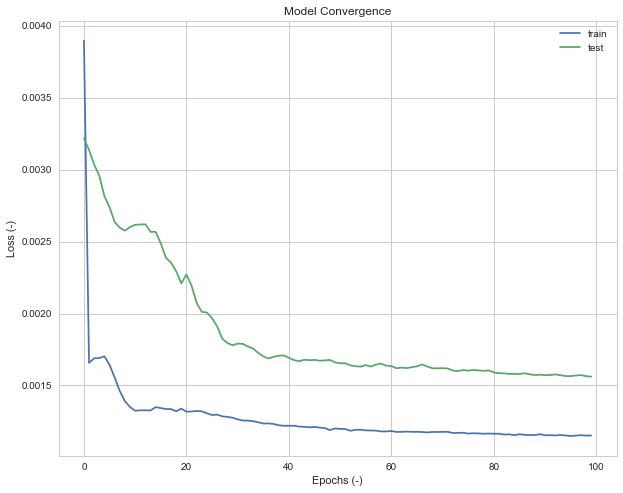

In [40]:
# Combine all data in one dataframe
from ml_utils import prep_dataframe_ML
from ml_utils import fit_model_ML

# Always have an item called 'REF', the rest can be anything
tuple_features = (['REF', 'CO_AD_BASE_30_FILTER'],
                 ['A', 'CO_MICS_RAW'],
                 ['B', 'TEMP'],
                 ['C', 'HUM'],
                 ['D', 'EXT_PM_25'])

model_name_ML = 'LSTM CO - epochs = 100 - filter_alpha = 0.3 -  traintest = 0.8 - 3 lags'
device_name = '4748'

ratio_train = 4./5 # Important that this is a float, don't forget the .
alpha_filter = 0.3 # 1 means no filtering

# Number of lags for the model
n_lags = 3

## Prep Dataframe
dataframeModel = readings[test_model]['devices'][name_combined_data]['data']

min_date = '2018-08-01 00:00:00'
max_date = '2018-09-20 00:00:00'
dataframeModel = dataframeModel[dataframeModel.index > min_date]
dataframeModel = dataframeModel[dataframeModel.index < max_date]

dataframeModel = dataframeModel.groupby(pd.Grouper(freq='10Min')).aggregate(np.mean)

list_features = list()
for item in tuple_features: 
    if item[0] == 'REF':
        list_features.insert(0,item[1] + '_' + device_name)
        reference_name = item[1] + '_' + device_name
    else:
        list_features.append(item[1] + '_' + device_name)

index, train_X, train_y, test_X, test_y, scalerX, scalery, n_train_periods = prep_dataframe_ML(dataframeModel, min_date, max_date, list_features, n_lags, ratio_train, alpha_filter, reference_name)
# Model Fit
model = fit_model_ML(train_X, train_y, 
                      test_X, test_y, 
                      epochs = 100, batch_size = 72, 
                      verbose = 2, plotResult = True, 
                      loss = 'mse', optimizer = 'adam')

### Model prediction

		 Train 		 Test
avg_ref: 	 0.61829 	 0.67981 
sig_est: 	 0.06668 	 0.04268 
RMSD: 	 0.12493 	 0.15025 
avg_est: 	 0.61765 	 0.62445 
sigma_norm: 	 0.45661 	 0.27938 
sign_sigma: 	 -1.00000 	 -1.00000 
sig_ref: 	 0.14603 	 0.15278 
bias: 	 -0.00065 	 -0.05536 
RMSD_norm_unb: 	 0.85769 	 0.98841 
rsquared: 	 0.26812 	 0.03274 
normalised_bias: 	 -0.00443 	 -0.36235 


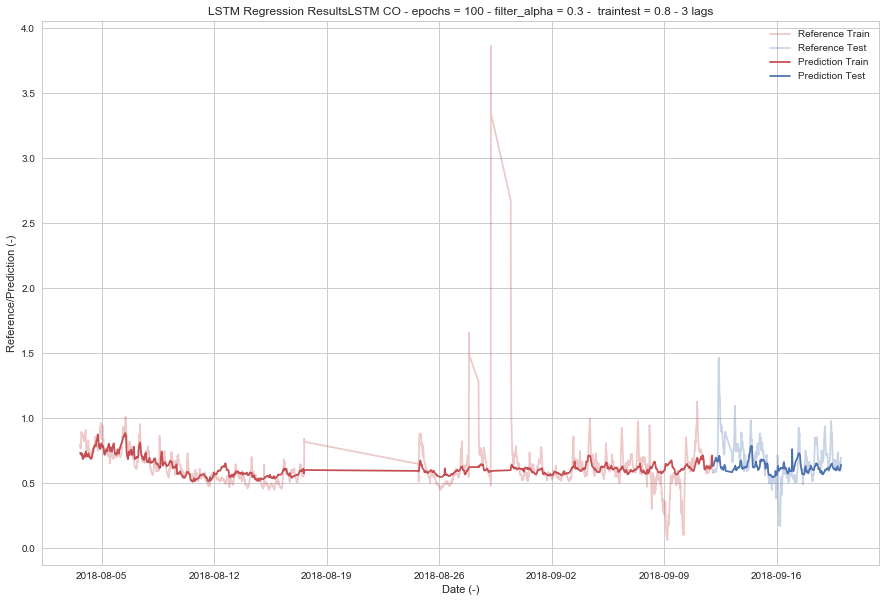

In [41]:
from ml_utils import predict_ML, get_inverse_transform_ML
from signal_utils import metrics
import matplotlib.pyplot as plot
%matplotlib inline

# Get model prediction
inv_y_train = get_inverse_transform_ML(train_y, n_lags, scalery)
inv_yhat_train = predict_ML(model, train_X, n_lags, scalery)

inv_y_test = get_inverse_transform_ML(test_y, n_lags, scalery)
inv_yhat_test = predict_ML(model, test_X, n_lags, scalery)

dataFrameTrain = pd.DataFrame(data = {'reference': inv_y_train, 'prediction': inv_yhat_train}, 
                              index = index[:n_train_periods])
dataFrameTest = pd.DataFrame(data = {'reference': inv_y_test, 'prediction': inv_yhat_test}, 
                              index = index[n_train_periods+n_lags:])

dataFrameExport = dataFrameTrain.copy()
dataFrameExport = dataFrameExport.combine_first(dataFrameTest)

# Get model metrics
metrics_model_train = metrics(inv_y_train, inv_yhat_train)
metrics_model_test = metrics(inv_y_test, inv_yhat_test)

## Print Metrics
print('\t\t Train \t\t Test')
for item in metrics_model_train.keys():
    print ('% s: \t %.5f \t %.5f ' % (item, metrics_model_train[item], metrics_model_test[item]))

# Plot
fig = plot.figure(figsize=(15,10))
# Actual data
plot.plot(index[:n_train_periods], inv_y_train,'r', label = 'Reference Train', alpha = 0.3)
plot.plot(index[n_train_periods+n_lags:], inv_y_test, 'b', label = 'Reference Test', alpha = 0.3)
# Fitted Values for Training
plot.plot(index[:n_train_periods], inv_yhat_train, 'r', label = 'Prediction Train')

# Fitted Values for Test
plot.plot(index[n_train_periods+n_lags:], inv_yhat_test, 'b', label = 'Prediction Test')

plot.title('LSTM Regression Results' + model_name_ML)
plot.ylabel('Reference/Prediction (-)')
plot.xlabel('Date (-)')
plot.legend(loc='best')
plot.show()

## Put everything in the dict
dictModel = readings[test_model]['devices'][name_combined_data]

# From https://hackmd.io/Y62wiJw0RaiBfU4Xhv8dQQ#
dictModel[model_name_ML] = dict()
dictModel[model_name_ML]['metrics'] = dict()
dictModel[model_name_ML]['metrics']['train'] = metrics_model_train
dictModel[model_name_ML]['metrics']['test'] = metrics_model_test

# Model Parameters
dictModel[model_name_ML]['parameters'] = dict()
dictModel[model_name_ML]['parameters']['features'] = tuple_features
dictModel[model_name_ML]['parameters']['ratio_train'] = n_train_periods
dictModel[model_name_ML]['parameters']['scalerX'] = scalerX
dictModel[model_name_ML]['parameters']['scalery'] = scalery
dictModel[model_name_ML]['parameters']['n_lags'] = n_lags
dictModel[model_name_ML]['parameters']['alpha_filter'] = alpha_filter

dictModel[model_name_ML]['data'] = dict()
dictModel[model_name_ML]['data']['train'] = dataFrameTrain
dictModel[model_name_ML]['data']['test'] = dataFrameTest
dictModel[model_name_ML]['model'] = model

# Put it back in the readings dataframe
readings[test_model]['devices'][name_combined_data]['model'][model_name_ML] = dictModel[model_name_ML]
readings[test_model]['devices'][model_name_ML] = dict()
readings[test_model]['devices'][model_name_ML]['data'] = dataFrameExport

### Model Export to Disk

In [42]:
from os.path import join
from sklearn.externals import joblib
import json

directory = '/Users/macoscar/Documents/04_Projects/02_FabLab/02_SmartCitizen/04_iScape/99_DataAnalysis/smartcitizen-iscape-models/'
modelType = 'MICS' # MICS, ALPHASENSE OR PMS
modelDirML = join(directory, 'Models/', modelType)
summaryDir = join(directory, 'Models/summary.json')
filenameML = join(modelDirML, model_name_ML)

# Save everything
joblib.dump(dictModel[model_name_ML]['metrics'], filenameML + '_metrics.sav')
joblib.dump(dictModel[model_name_ML]['parameters'], filenameML + '_parameters.sav')
model_json = model.to_json()
with open(filenameML + "_model.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights(filenameML + "_model.h5")
print("Model: \n\t" + model_name_ML + "\nSaved in:\n\t" + modelDirML)

summary = json.load(open(summaryDir, 'r'))
summary[modelType][model_name_ML] = dict()
summary[modelType][model_name_ML] = ''

with open(summaryDir, 'w') as json_file:
    json_file.write(json.dumps(summary))
    json_file.close()

Model: 
	LSTM CO - epochs = 100 - filter_alpha = 0.3 -  traintest = 0.8 - 3 lags
Saved in:
	/Users/macoscar/Documents/04_Projects/02_FabLab/02_SmartCitizen/04_iScape/99_DataAnalysis/smartcitizen-iscape-models/Models/MICS


## Model Comparison

### TimeSeries Comparison

In [ ]:
import matplotlib.pyplot as plt
import plotly.tools as tls

fig = plt.figure(figsize=(15,10))
referencePlotted = False

for model in readings[test_model]['devices'][name_combined_data]['model']:
    data = readings[test_model]['devices'][name_combined_data]['model'][model]['data']
    if (not referencePlotted):
        plt.plot(data['train'].index, data['train']['referenceTrain'], 'b', label = 'Reference', alpha = 0.3)
        plt.plot(data['test'].index, data['test']['referenceTest'], 'b', label = 'Reference', alpha = 0.3)
        referencePlotted = True
        
    plt.plot(data['train'].index, data['train']['predictionTrain'], label = 'Prediction Train ' + model)
    plt.plot(data['test'].index, data['test']['predictionTest'], label = 'Prediction Test ' + model)

plt.legend(loc = 'best')
plt.ylabel('CO (ppm)')
plt.xlabel('Date (-)')
plt.title('Model Comparison for ' + dict(readings[test_model]['devices'][name_combined_data]['model'][model]['parameters']['features'])["REF"])

### Model Metrics Comparison

In [ ]:
from math import sqrt
import matplotlib.pyplot as plot
%matplotlib inline

for model in readings[test_model]['devices'][name_combined_data]['model']:
    print '-----------------------------------------------------'
    print '\nModel Name: {}'.format(model)
    print '\n\t\t Train \t\t Test'
    metrics_model = readings[test_model]['devices'][name_combined_data]['model'][model]['metrics']
    for item in metrics_model['train']:
        print ('% s: \t %.5f \t %.5f ' % (item, metrics_model['train'][item], metrics_model['test'][item]))

def minRtarget(targetR):
    return sqrt(1+ np.power(targetR,2)-2*np.power(targetR,2))

_plot_train = True
_dataframe = readings[test_model]['devices'][name_combined_data]

def targetDiagram(dataframe, plot_train):

    targetR20 = 0.5
    targetR0 = sqrt(targetR20)
    MR0 = minRtarget(targetR0)
    targetR21 = 0.7
    targetR1 = sqrt(targetR21)
    MR1 = minRtarget(targetR1)
    targetR22 = 0.9
    targetR2 = sqrt(targetR22)
    MR2 = minRtarget(targetR2)


    fig  = plot.figure(figsize=(13,13))
    for model in readings[test_model]['devices'][name_combined_data]['model']:
        metrics_model = dataframe[model]['metrics']
    
        if plot_train == True:
            plot.scatter(metrics_model['train']['sign_sigma']*metrics_model['train']['RMSD_norm_unb'], metrics_model['train']['normalised_bias'], label = 'Train ' + model)
        plot.scatter(metrics_model['test']['sign_sigma']*metrics_model['test']['RMSD_norm_unb'], metrics_model['test']['normalised_bias'], label = 'Test ' + model)
    
    ## Add circles
    ax = plot.gca()
    circle1 = plot.Circle((0, 0), 1, linewidth = 0.8, color='k', fill =False)
    circleMR0 = plot.Circle((0, 0), MR0, linewidth = 0.8, color='r', fill=False)
    circleMR1 = plot.Circle((0, 0), MR1, linewidth = 0.8, color='y', fill=False)
    circleMR2 = plot.Circle((0, 0), MR2, linewidth = 0.8, color='g', fill=False)
    
    circle3 = plot.Circle((0, 0), 0.01, color='k', fill=True)
    
    ## Add annotations
    ax.add_artist(circle1)
    ax.annotate('R2 < 0',
                xy=(1, 0), xycoords='data',
                xytext=(-35, 10), textcoords='offset points')
    
    ax.add_artist(circleMR0)
    ax.annotate('R2 < ' + str(targetR20),
                xy=(MR0, 0), xycoords='data',
                xytext=(-35, 10), textcoords='offset points', color = 'r')
    
    ax.add_artist(circleMR1)
    ax.annotate('R2 < ' + str(targetR21),
                xy=(MR1, 0), xycoords='data',
                xytext=(-45, 10), textcoords='offset points', color = 'y')
    
    
    ax.add_artist(circleMR2)
    ax.annotate('R2 < ' + str(targetR22),
                xy=(MR2, 0), xycoords='data',
                xytext=(-45, 10), textcoords='offset points', color = 'g')
    ax.add_artist(circle3)
    
    ## Display and others
    plt.axhline(0, color='black', linewidth = 0.5)
    plt.axvline(0, color='black', linewidth = 0.5)
    plot.legend(loc='best')
    plot.xlim([-1.1,1.1])
    plot.ylim([-1.1,1.1])
    plot.title('Target Diagram')
    plot.ylabel('Normalised Bias (-)')
    plot.xlabel("RMSD*'")
    plot.show()
    

targetDiagram(_dataframe, _plot_train)

# Data Model Load

## Import Model

In [43]:
from os.path import join
from sklearn.externals import joblib
from keras.models import model_from_json
import json

modelDirML = '/Users/macoscar/Documents/04_Projects/02_FabLab/02_SmartCitizen/04_iScape/99_DataAnalysis/smartcitizen-iscape-models/Models/'

dict_models = dict()
with open(join(modelDirML, 'summary.json'), 'r') as summary_file:
    dict_models = json.load(summary_file)
    
selectedModels = tuple()
def selectModels(Source):
    global selectedModels
    selectedModels = list(Source)
    
def loadModel(b):
    filenameML = join(modelDirML, type_drop.value, selectedModels[0])
    
    global loaded_model
    global loaded_params
    global loaded_metrics
    # Load Model and weights
    json_file = open(filenameML + "_model.json", "r")
    loaded_model_json = json_file.read()
    json_file.close()
    
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights(filenameML + "_model.h5")
    # Load params and metrics
    loaded_params = joblib.load(filenameML + '_parameters.sav')
    loaded_metrics = joblib.load(filenameML + '_metrics.sav')
    
    print("Loaded " + selectedModels[0] + " from disk")
    
def show_models(Source):
    list_models = list()
    for item in dict_models[Source]:
        list_models.append(item)
    models.options = list(list_models)

display(widgets.HTML('<hr><h4>Import Local Models</h4>'))

type_drop = widgets.Dropdown(options = ['ALPHASENSE', 'MICS', 'PMS'],
                                  value = 'MICS',
                                  description = 'Model Target',
                                  layout = widgets.Layout(width='300px'))

model_type_drop = widgets.interactive(show_models, 
                                Source=type_drop, 
                                layout=widgets.Layout(width='700px'))

models = widgets.SelectMultiple(selected_labels = selectedModels, 
                           layout=widgets.Layout(width='700px'))

models_interact = widgets.interactive(selectModels,
                                     Source = models,
                                     layout = widgets.Layout(width='700px'))
display(model_type_drop)
display(models)

loadB = widgets.Button(description='Load Model')
loadB.on_click(loadModel)

buttonBox = widgets.HBox([loadB])
display(buttonBox)

Loaded LSTM CO - epochs = 100 - filter_alpha = 0.3 -  traintest = 0.8 - 3 lags from disk


## Apply Model

DataFrame has been reframed and prepared for supervised learning forecasting
Features are: ['CO_MICS_RAW', 'TEMP', 'HUM', 'EXT_PM_25']
Test X Shape (28947, 3, 4)


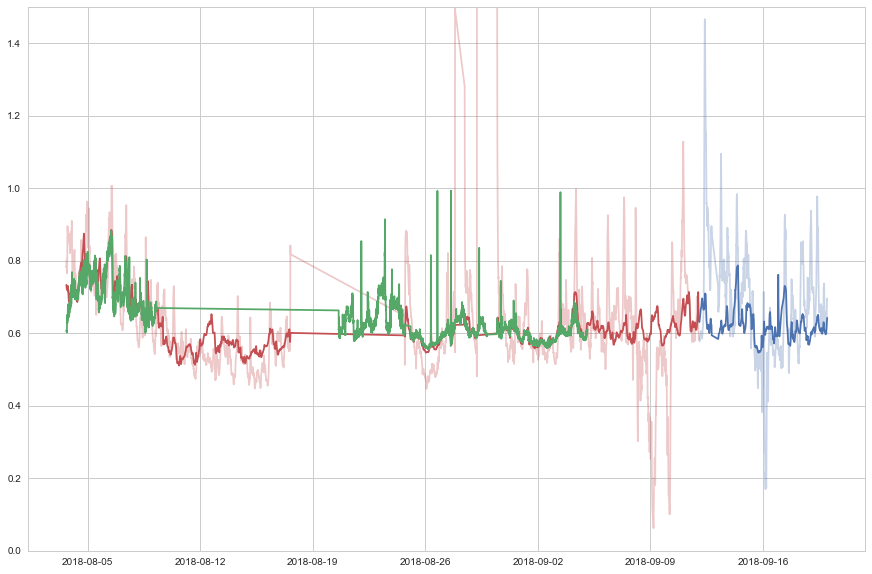

In [53]:
from ml_utils import prep_prediction_ML
from ml_utils import predict_ML
import matplotlib.pyplot as plot
%matplotlib inline

# ---

# Input
test_name = '2018-08_INT_STATION_TEST_SUMMER_HOLIDAYS'
device_name = 'STATION CHIMNEY'
prediction_name = 'CO_MICS_ppm'
min_date = '2018-08-01 00:00:00'
max_date = '2018-09-20 00:00:00'
# ---

model_predict = loaded_model
tuple_feat_predict = loaded_params['features'] 
scalerX_predict = loaded_params['scalerX']
scalery_predict = loaded_params['scalery']
n_lags = loaded_params['n_lags']
alpha_filter = loaded_params['alpha_filter']
n_train_periods = loaded_params['ratio_train']

## Prep Dataframe
dataframeModel = readings[test_name]['devices'][device_name]['data']
dataframeModel = dataframeModel[dataframeModel.index > min_date]
dataframeModel = dataframeModel[dataframeModel.index < max_date]

# dataframeModel = dataframeModel.groupby(pd.Grouper(freq='10Min')).aggregate(np.mean)

list_features_predict = list()
for item in tuple_feat_predict: 
    if item[0] != 'REF':
        list_features_predict.append(item[1])

test_X, index_pred, n_obs = prep_prediction_ML(dataframeModel, list_features_predict, n_lags, alpha_filter, scalerX_predict, verbose = True)
prediction = predict_ML(model_predict, test_X, n_lags, scalery_predict)
dataframe = pd.DataFrame(prediction, columns = [prediction_name]).set_index(index_pred)
readings[test_name]['devices'][device_name]['data'][prediction_name] = dataframe.loc[:,prediction_name]

# Plot
fig = plot.figure(figsize=(15,10))

# Actual data
try:
    plot.plot(dataFrameTrain.index, dataFrameTrain['reference'],'r', label = 'Reference Train', alpha = 0.3)
    plot.plot(dataFrameTest.index, dataFrameTest['reference'], 'b', label = 'Reference Test', alpha = 0.3)
    # Fitted Values for Training
    plot.plot(dataFrameTrain.index, dataFrameTrain['prediction'], 'r', label = 'Prediction Train')
    # Fitted Values for Test
    plot.plot(dataFrameTest.index, dataFrameTest['prediction'], 'b', label = 'Prediction Test')
except:
    print 'No data available for reference'
    
# Fitted values
plot.plot(dataframe.index, dataframe.loc[:, prediction_name], 'g')
plot.ylim([0,1.5])
plot.grid(True)

In [ ]:
## ARIMAX
model = sm.tsa.SARIMAX(endog = train_y,
                       exog = train_X,
                       order= (7,0,7),
                       enforce_invertibility=False,
                       enforce_stationarity=False,
                       trend='c')
                
results = model.fit(disp=0)
                

inv_y = test_y
prediction = results.get_prediction(full_results=True,
                                alpha=0.05)

forecast = results.get_forecast(test_y.shape[0], 
                                exog=test_X)

inv_yhat_prediction = prediction.predicted_mean
inv_yhat = forecast.predicted_mean

# Get your prediction intervals by alpha parameter. alpha=0.05 implies 95% CI
inv_yhat_cis_prediction = prediction.conf_int(alpha=0.05)
inv_yhat_cis = forecast.conf_int(alpha=0.05)
print(results.summary())
